In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import statistics
import os
import sweetviz as sv
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, re
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics


In [2]:
## alernative A
os.getcwd()
df = pd.read_csv('SGCM_car_data_with_COE_11092022v4.csv', sep=',', encoding='latin1')
df.head()

,ad_id,vehicle_type,title,make,model,variant,title_with_manufactured_year,manufactured_year,posted_date,reg_date,...,dereg_value,omv,coe,arf,engine_capacity,power,curb_weight,no_of_owners,Cat_Type,COE_of_the_month_in_2022
0,1077001,Luxury Sedan,BMW 5 Series 520i Luxury,BMW,5 Series,520i Luxury,BMW 5 Series 520i Luxury [2013],2013,26/3/22,31/3/14,...,42394.0,47529.0,82900.0,53541.0,1997.0,135.0,1615.0,4.0,Category B,110526
1,1068745,Hatchback,BMW 1 Series 116d,BMW,1 Series,116d,BMW 1 Series 116d [2015],2015,24/4/22,29/12/15,...,24671.0,23732.0,57501.0,10225.0,1496.0,85.0,1350.0,2.0,Category A,85000
2,1068742,Luxury Sedan,Bentley Continental Flying Spur 6.0A,Bentley,Continental Flying Spur,6.0A,Bentley Continental Flying Spur 6.0A [2005],2005,28/4/22,28/11/05,...,NaN,192662.0,60519.0,211929.0,5998.0,412.0,2525.0,5.0,Category B,110526
3,1030012,Luxury Sedan,Honda Accord 2.0A,Honda,Accord,2.0A,Honda Accord 2.0A [2006],2006,28/4/22,5/9/06,...,18555.0,26549.0,48479.0,29204.0,1998.0,110.0,1435.0,3.0,Category B,110526
4,1042799,SUV,Volkswagen Tiguan 2.0A TSI,Volkswagen,Tiguan,2.0A TSI,Volkswagen Tiguan 2.0A TSI [2010],2010,22/6/22,25/2/11,...,NaN,26792.0,20357.0,26792.0,1984.0,125.0,1648.0,3.0,Category B,110526


In [3]:
# ## alernative B
# os.getcwd()
# file_path = '/Users/weipengten/Desktop/CS610-Applied Machine Learning/Project/'
# try:
#     df = pd.read_csv(file_path + 'SGCM_car_data_with_COE_11092022v4.csv', sep=',')
# except UnicodeDecodeError:
#     df = pd.read_csv(file_path + 'SGCM_car_data_with_COE_11092022v4.csv', encoding='latin1')

# Basic Settings

In [4]:
# Set display options to show the full list
## pd.set_option('display.max_rows', None) ## slow down jupyter notebook
## pd.set_option('display.max_colwidth', None) ## slow down jupyter notebook
df.set_index('ad_id', inplace=True)
df.head()

,vehicle_type,title,make,model,variant,title_with_manufactured_year,manufactured_year,posted_date,reg_date,scrape_date,...,dereg_value,omv,coe,arf,engine_capacity,power,curb_weight,no_of_owners,Cat_Type,COE_of_the_month_in_2022
ad_id,,,,,,,,,,,,,,,,,,,,,
1077001,Luxury Sedan,BMW 5 Series 520i Luxury,BMW,5 Series,520i Luxury,BMW 5 Series 520i Luxury [2013],2013,26/3/22,31/3/14,11/9/22,...,42394.0,47529.0,82900.0,53541.0,1997.0,135.0,1615.0,4.0,Category B,110526
1068745,Hatchback,BMW 1 Series 116d,BMW,1 Series,116d,BMW 1 Series 116d [2015],2015,24/4/22,29/12/15,11/9/22,...,24671.0,23732.0,57501.0,10225.0,1496.0,85.0,1350.0,2.0,Category A,85000
1068742,Luxury Sedan,Bentley Continental Flying Spur 6.0A,Bentley,Continental Flying Spur,6.0A,Bentley Continental Flying Spur 6.0A [2005],2005,28/4/22,28/11/05,11/9/22,...,NaN,192662.0,60519.0,211929.0,5998.0,412.0,2525.0,5.0,Category B,110526
1030012,Luxury Sedan,Honda Accord 2.0A,Honda,Accord,2.0A,Honda Accord 2.0A [2006],2006,28/4/22,5/9/06,11/9/22,...,18555.0,26549.0,48479.0,29204.0,1998.0,110.0,1435.0,3.0,Category B,110526
1042799,SUV,Volkswagen Tiguan 2.0A TSI,Volkswagen,Tiguan,2.0A TSI,Volkswagen Tiguan 2.0A TSI [2010],2010,22/6/22,25/2/11,11/9/22,...,NaN,26792.0,20357.0,26792.0,1984.0,125.0,1648.0,3.0,Category B,110526


In [5]:
column_names = df.columns.tolist()
print(column_names)
print('    ')
print(df.describe())
print('    ')
df.info()

['vehicle_type', 'title', 'make', 'model', 'variant', 'title_with_manufactured_year', 'manufactured_year', 'posted_date', 'reg_date', 'scrape_date', 'updated_date', 'category', 'parf/coe', 'opc/non-opc', 'consignment/non-consignment', 'direct owner/dealer', 'depreciation', 'price', 'status', 'url', 'mileage', 'road_tax', 'transmission', 'dereg_value', 'omv', 'coe', 'arf', 'engine_capacity', 'power', 'curb_weight', 'no_of_owners', 'Cat_Type', 'COE_of_the_month_in_2022']
    
       manufactured_year  depreciation         price       mileage  \
count       34213.000000  1.863000e+04  3.395500e+04  1.486200e+04   
mean         2014.695320  1.949182e+04  1.144376e+05  7.259616e+04   
std             5.534407  2.857835e+04  1.261340e+05  5.278260e+04   
min          1835.000000  3.880000e+03  9.990000e+02  1.000000e+00   
25%          2011.000000  1.170000e+04  5.880000e+04  3.000000e+04   
50%          2016.000000  1.455500e+04  8.480000e+04  6.750000e+04   
75%          2018.000000  2.028

# Converting DataTypes

In [6]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, re
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, feature_extraction
# changing posted_date, reg_date, updated_date
df['posted_date'] = pd.to_datetime(df['posted_date'], format='mixed')
df['reg_date'] = pd.to_datetime(df['reg_date'], format='mixed')
df['updated_date'] = pd.to_datetime(df['updated_date'], format='mixed')

# vehicle_age
df['manufactured_year'] = df['manufactured_year'].astype(int)
df['vehicle_age'] = df['posted_date'].dt.year - df['manufactured_year']
df['manufactured_year'] = df['manufactured_year'].astype(str)
 
# for all Dtype objects, change all to str type
df['vehicle_type'] = df['vehicle_type'].astype(str)
df['title'] = df['title'].astype(str)
df['make'] = df['make'].astype(str)
df['model'] = df['model'].astype(str)
df['variant'] = df['variant'].astype(str)
df['title_with_manufactured_year'] = df['title_with_manufactured_year'].astype(str)
df['transmission'] = df['transmission'].astype('str')
df['category'] = df['category'].astype(str)

# for all string types, make all lower case for consistency
df['vehicle_type'] = df['vehicle_type'].str.lower()
df['title'] = df['title'].str.lower()
df['make'] = df['make'].str.lower()
df['model'] = df['model'].str.lower()
df['variant'] = df['variant'].str.lower()

# Data Sensing (Specific Cleaning)

In [7]:
### Make
df.loc[df['make'] == "Mercedes Benz", 'make'] = "Mercedes-Benz"
df.loc[df['make'] == "Rolls-Royce", 'make'] = "Rolls-Royce"

### Engine_capacity
df['engine_capacity'] = df['engine_capacity'].replace(0, np.nan)


### Category
df['category'] = df['category'].replace('', np.nan)
df['category'].fillna('None', inplace=True)

# Categorical Columns Preprocessing

In [8]:
# top make column
top_make = df['make'].value_counts().nlargest(15).index.tolist()
df.loc[df['make'].isin(top_make), 'make'] = df['make']
df.loc[~df['make'].isin(top_make), 'make'] = 'Other make'

# top manufactured_year column
top_manufactured_year = df['manufactured_year'].value_counts().nlargest(10).index.tolist()
df.loc[df['manufactured_year'].isin(top_manufactured_year), 'manufactured_year'] = df['manufactured_year']
df.loc[~df['manufactured_year'].isin(top_manufactured_year), 'manufactured_year'] = 'Other_manufactured_year'
# df['manufactured_year'].value_counts()


# # IsContinental (1 or 0)
# ### filter out certain makes from the dataframe
# df = df[~df['make'].isin(['Hummer', 'Pontiac', 'Tesla'])]
# # Define the Asian makes list
# asian = ["BYD", "Chery Fulwin", "Daihatsu", "Datsun", "Honda", "Hyundai", "Infiniti", "Kia", "Lexus", "Mazda", "Mitsubishi", "Mitsuoka", "Nissan", "Perodua", "Proton", "Sinotruk", "Suzuki", "Toyota"]
# # Create the Continental column based on the make
# df['Continental'] = np.where(df['make'].isin(asian), 0, 1)


In [9]:
### Category

df['CAT_Almost_New_Car'] = df['category'].str.contains('Almost New Car').map({True: 'Y', False: 'N'})
df['CAT_Low_Mileage_Car'] = df['category'].str.contains('Low Mileage Car').map({True: 'Y', False: 'N'})
df['CAT_Premium_Ad_Car'] = df['category'].str.contains('Premium Ad Car').map({True: 'Y', False: 'N'})
df['CAT_Hybrid_Cars'] = df['category'].str.contains('Hybrid Cars').map({True: 'Y', False: 'N'})
df['CAT_Sgcarmart_Warranty_Cars'] = df['category'].str.contains('Sgcarmart Warranty Cars').map({True: 'Y', False: 'N'})

df['parf/coe'] = df['parf/coe'].astype(str)
df['opc/non-opc'] = df['opc/non-opc'].astype(str)
df['consignment/non-consignment'] = df['consignment/non-consignment'].astype(str)
df['direct owner/dealer'] = df['direct owner/dealer'].astype(str)

# Continuous Variables Columns Preprocessing

In [10]:
## creating smart binning function and treating nan value as separate category
def smart_binning(_df, _name, _tgt, bin_size):
    if _tgt in _df.columns:
        _df = _df.drop(_tgt, axis=1)
        
    ## default the type to float
    _df[_name] = df[_name].astype(float)

    ## fill nan value to -1
    _df['_tmp'] = df[_name]
    _df['_tmp'].fillna(-1, inplace=True)
    
    ## sorting the value
    _d_df1 = _df.sort_values(by='_tmp')
    
    ## initializing bin with -1 for nan.
    _d_df1['_bin'] = np.nan
    _d_cdt = _d_df1['_tmp'] == -1
    _d_df1.loc[_d_cdt, '_bin'] = 1
    
    ## excluding -1 from percentile for bin creation
    _d_qtl = np.linspace(0, 100, bin_size + 1)[1:-1]
    
    ## excluding -1 from data for remanning bin creation
    _d_df2 = _d_df1[~_d_cdt]
    _d_pct = np.percentile(_d_df2['_tmp'], _d_qtl)
    _d_df2.loc[_d_df2.index, '_bin'] = np.searchsorted(_d_pct, _d_df2['_tmp'], side='right') + 2
    
    ## add bins to df1
    _d_df1.update(_d_df2)
    
    ## mapping labels
    _d_df1_ranges = _d_df1.groupby('_bin')['_tmp'].agg(['min', 'max'])
    _d_df1_labels = _d_df1_ranges.apply(lambda x: f"{x['min']}-{x['max']}", axis=1)
    _d_df1['_tgt'] = _d_df1['_bin'].map(_d_df1_labels)
    
    ## merge back to dataframe
    _df = pd.merge(_df, _d_df1[['_tgt']], left_index=True, right_index=True, how='left')
    _df[_tgt] = _df['_tgt']

    ## drop columns
    _df = _df.drop('_tmp', axis=1)
    _df = _df.drop('_tgt', axis=1)
    
    return _df


In [11]:
df = smart_binning(df, 'depreciation', 'depreciation_bin', 5)
df['depreciation_bin'].value_counts()

depreciation_bin
-1.0--1.0            15583
13280.0-16510.0       3735
22390.0-2260060.0     3730
11110.0-13270.0       3729
16520.0-22380.0       3722
3880.0-11100.0        3714
Name: count, dtype: int64

In [12]:
df = smart_binning(df, 'arf', 'arf_bin', 5)
df['arf_bin'].value_counts()

arf_bin
50778.0-1181240.0    6799
8.0-10644.0          6798
30274.0-50775.0      6798
10657.0-18541.0      6797
18543.0-30270.0      6796
-1.0--1.0             225
Name: count, dtype: int64

In [13]:
df = smart_binning(df, 'price', 'price_bin', 5)
df['price_bin'].value_counts()

price_bin
52800.0-73777.0       6854
149800.0-3588888.0    6828
73800.0-98777.0       6813
98800.0-149777.0      6760
999.0-52777.0         6700
-1.0--1.0              258
Name: count, dtype: int64

In [14]:
df = smart_binning(df, 'dereg_value', 'dereg_value_bin', 5)
df['dereg_value_bin'].value_counts()

dereg_value_bin
-1.0--1.0           16031
21683.0-30149.0      3639
63771.0-868663.0     3637
41414.0-63767.0      3636
30150.0-41411.0      3636
244.0-21676.0        3634
Name: count, dtype: int64

In [15]:
df = smart_binning(df, 'coe', 'coe_bin', 5)
df['coe_bin'].value_counts()

coe_bin
47001.0-56171.0     6711
37906.0-47000.0     6710
56206.0-114001.0    6699
31000.0-37900.0     6682
10.0-30999.0        6654
-1.0--1.0            757
Name: count, dtype: int64

In [16]:
df = smart_binning(df, 'curb_weight', 'curb_weight_bin', 5)
df['curb_weight_bin'].value_counts()

curb_weight_bin
1385.0-1527.0     6859
1735.0-28580.0    6793
1249.0-1383.0     6751
1528.0-1734.0     6660
2.0-1245.0        6556
-1.0--1.0          594
Name: count, dtype: int64

In [17]:
df = smart_binning(df, 'mileage', 'mileage_bin', 5)
df['mileage_bin'].value_counts()

mileage_bin
-1.0--1.0             19351
117000.0-1300000.0     2997
53000.0-81671.0        2980
1.0-22644.0            2973
22669.0-52965.0        2964
81686.0-116983.0       2948
Name: count, dtype: int64

In [18]:
df = smart_binning(df, 'vehicle_age', 'vehicle_age_group', 5)
df['vehicle_age_group'].value_counts()

vehicle_age_group
12.0-187.0    7913
7.0-11.0      7617
3.0-4.0       6917
5.0-6.0       6887
0.0-2.0       4879
Name: count, dtype: int64

In [19]:
# Define a function to determine the COE category
def get_coe_category(row):
    if row['CAT_Electric'] == 0:
        if row['engine_capacity'] <= 1600 and row['power'] <= 130:
            return 'Category A'
        else:
            return 'Category B'
    elif row['CAT_Electric'] == 1:
        if row['power'] <= 110:
            return 'Category A'
        else:
            return 'Category B'
    else:
        return 'Unknown'
    
    
def createlabelforbin(listx):
    l = len(listx)
    labels = []
    if l >= 3:
        labels.append(f'0.Below {listx[1]}')
        for i in range(1,l-2):
            labels.append(f"{i}.{listx[i]+1} - {listx[i+1]}")
        labels.append(f"{l-2}.Above {listx[l-2]+1}")
    return labels
    
def printna0(df,col):
    print(f"na : {len(df[df[col].isna()])}")
    print(f"0 : {len(df[df[col]==0])}")   
    
    
def keeptopn(df,col,n):
    print(f"before consolidation")
    print(df[col].value_counts())
    top = df[col].value_counts().nlargest(n).index.tolist()
    df.loc[df[col].isin(top),col] = df[col]
    df.loc[~df[col].isin(top),col] = f"other_{col}"
    print()
    print(f"after consolidation")
    print(df[col].value_counts())
    
    
def extract_from_category(df,col,str):
    df[f'CAT_{str}'] = df[col].str.contains(str).map({True: 1 , False: 0}).astype('category')
    

## Electric
extract_from_category(df,'category','Electric')

# Apply the function to each row in the DataFrame
df['COE_Category'] = df.apply(get_coe_category, axis=1)

# RoadTax Bins
bins = [0, 500, 700, 1000, 1500, 2000, 3000, np.inf]
df['road_tax_bin'] = pd.cut(df['road_tax'], bins=bins, labels=createlabelforbin(bins))
df['road_tax_bin'].value_counts()

# smaller OMV Bins (based on ARF banding)
bins = [0, 20000, 30000, 40000, 60000, 80000, np.inf]
df['omv_smallbin'] = pd.cut(df['omv'], bins=bins, labels=createlabelforbin(bins))
df['omv_smallbin'].value_counts()

# engine Bins
bins = [0, 1500, 2000, 2500, 3000, np.inf]
df['engine_capacity_bin'] = pd.cut(df['engine_capacity'], bins=bins, labels=createlabelforbin(bins))
df['engine_capacity_bin'].value_counts()

# power Bins
bins = [0, 80, 90, 100, 130, 160, 200, 250, 300, np.inf]
df['power_bin'] = pd.cut(df['power'], bins=bins, labels=createlabelforbin(bins))
df['power_bin'].value_counts()

power_bin
3.101 - 130    6953
2.91 - 100     4593
1.81 - 90      4547
4.131 - 160    4261
0.Below 80     3560
5.161 - 200    2392
6.201 - 250    1695
8.Above 301    1384
7.251 - 300     666
Name: count, dtype: int64

### Target Variable: Classification Problem for Time Taken To Sell Vehicle

In [20]:
# Deriving our target column: Time_taken_to_sell_classficationtype_test_3
df['Time_taken_to_sell_days']=df['updated_date']-df['posted_date']
df['Time_taken_to_sell_months'] = (df['updated_date'] - df['posted_date']).dt.days / 30
df['Time_taken_to_sell_weeks'] = (df['updated_date'] - df['posted_date']).dt.days / 7
df['Time_taken_to_sell_Target_Variable'] = np.where(df['Time_taken_to_sell_weeks'] < 1 & (df['status'] == "SOLD"), 'Sold in Less Than One Week',
                                                        np.where((df['Time_taken_to_sell_weeks'] >= 1) & (df['Time_taken_to_sell_weeks'] < 3)& (df['status'] == "SOLD"),'Sold in Less Than Three Weeks',        
                                                                'Not sold within Three Weeks'))

                                             |          | [  0%]   00:00 -> (? left)


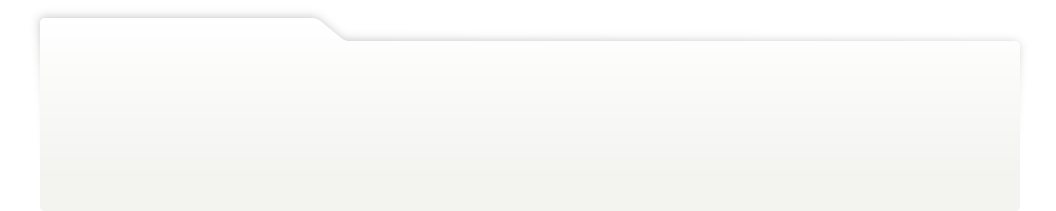
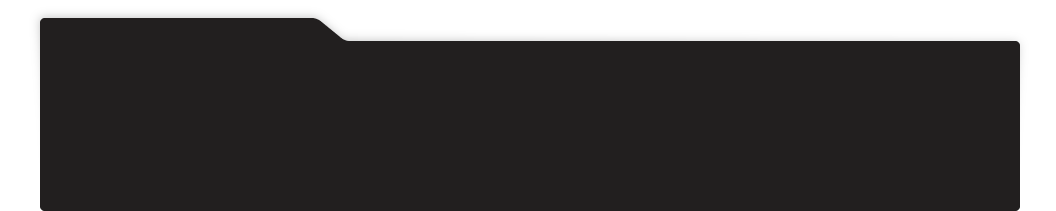
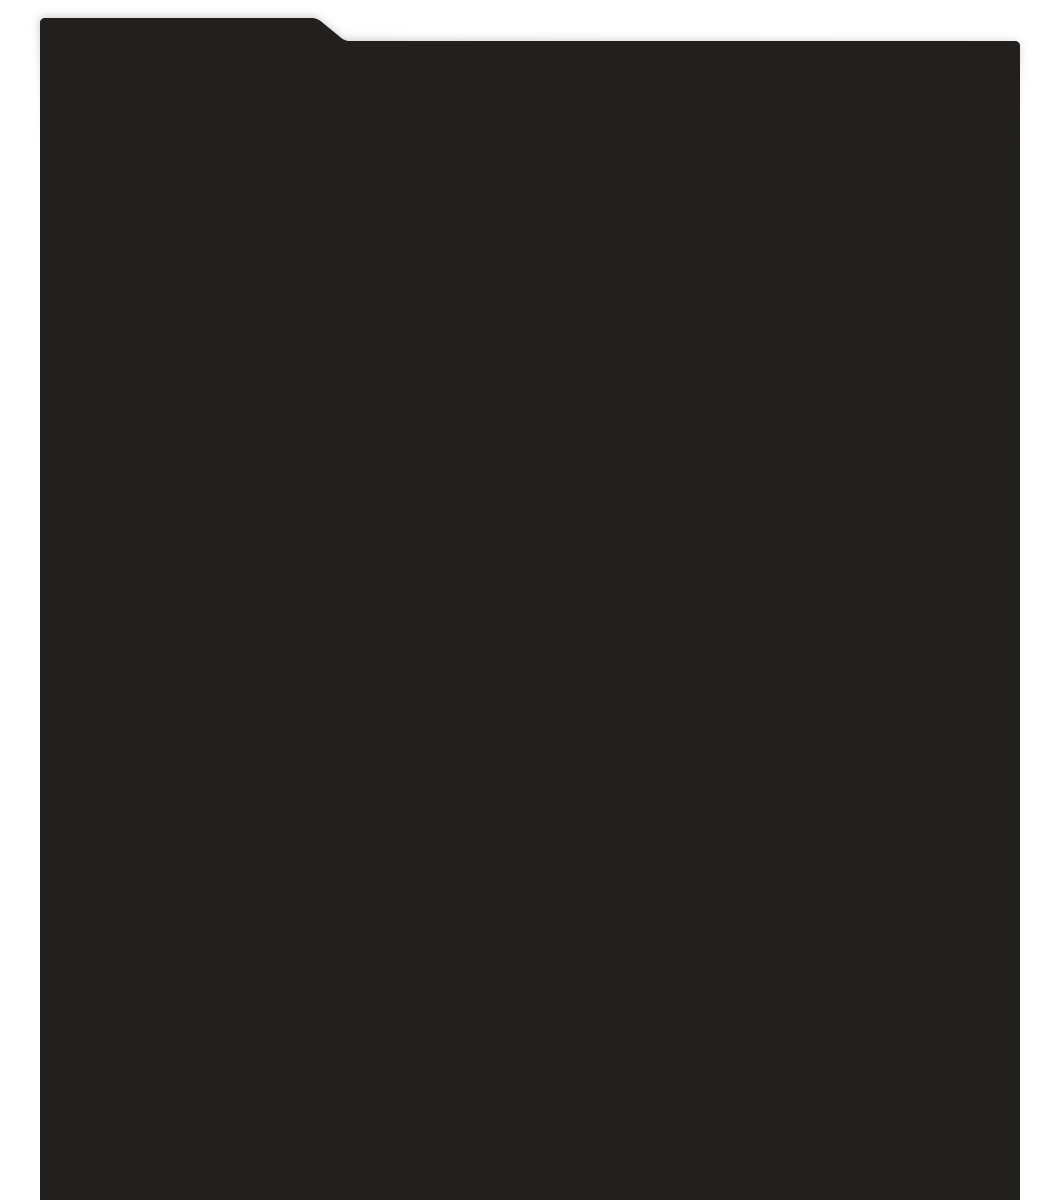
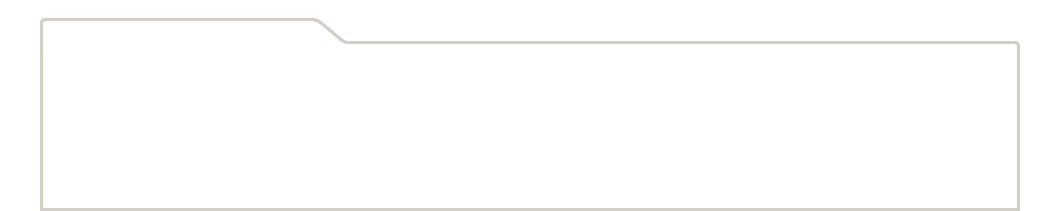
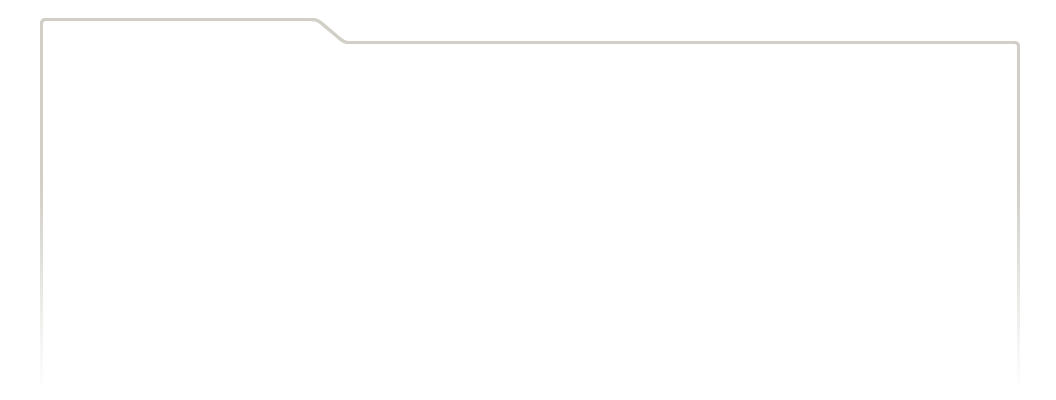
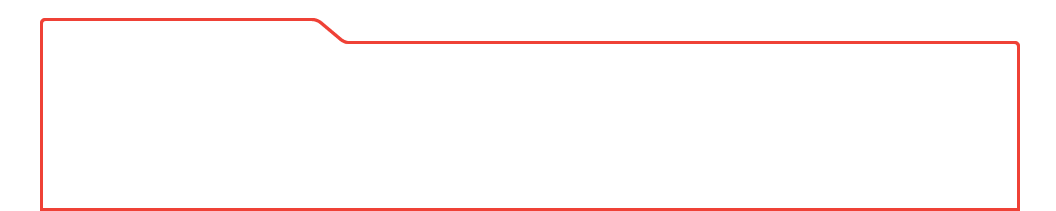
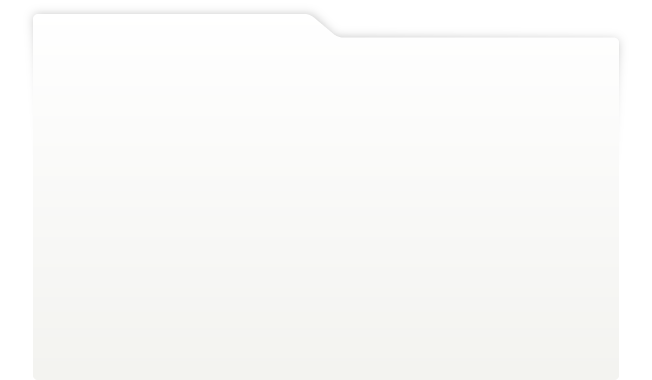
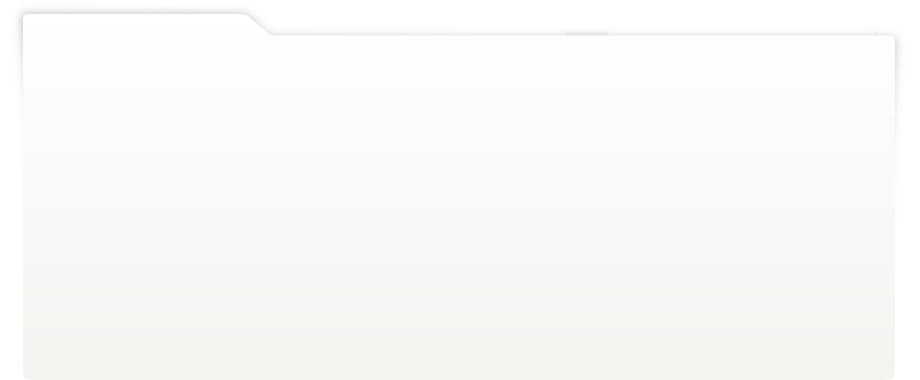
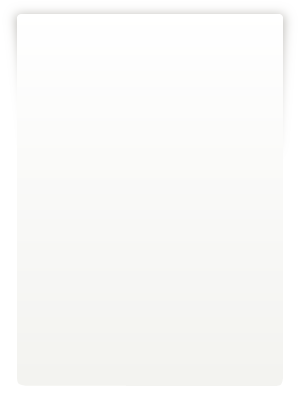
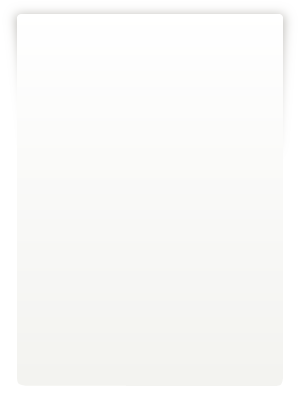
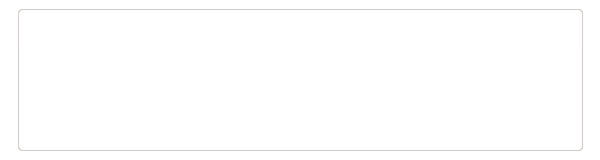
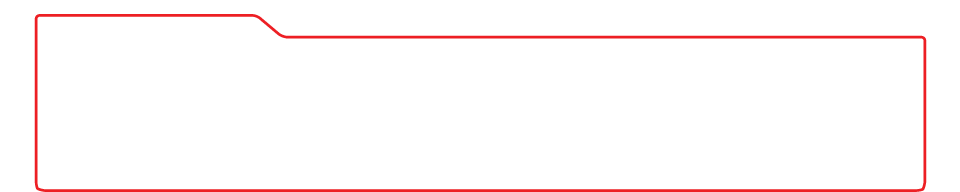
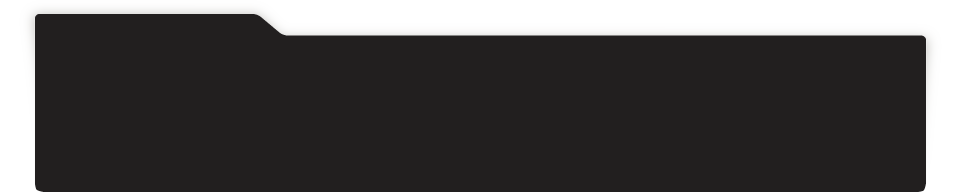
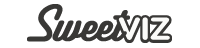
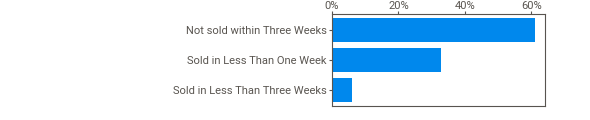
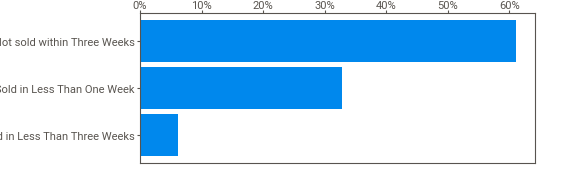
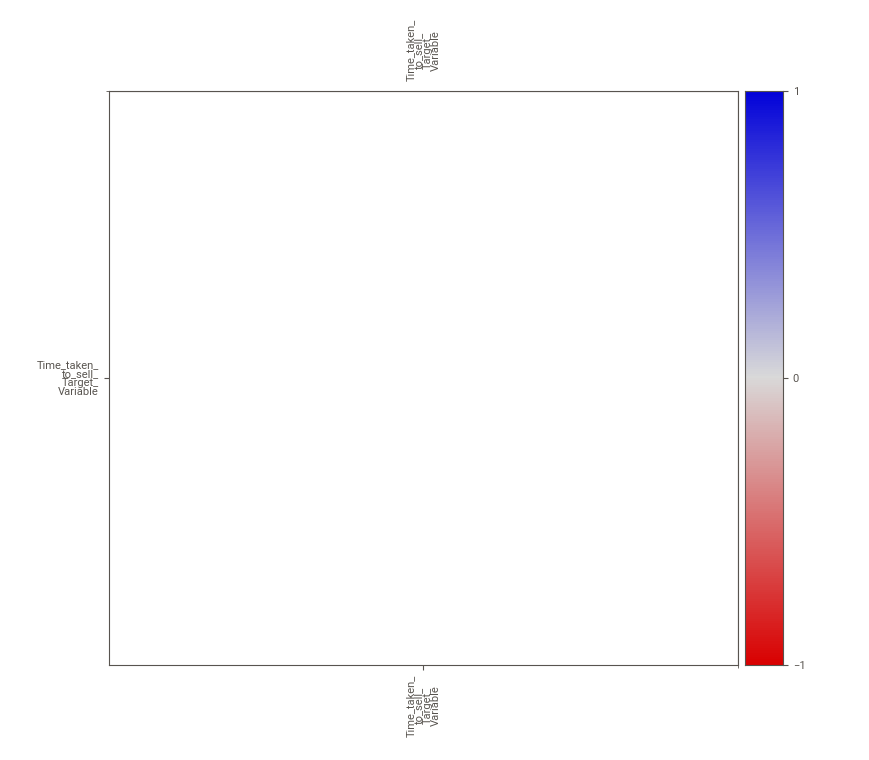
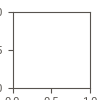

In [21]:
columns_to_check = ['Time_taken_to_sell_Target_Variable']
df_eda=df[columns_to_check]
analyze_report = sv.analyze(df_eda)
analyze_report.show_notebook()

['parf/coe', 'opc/non-opc', 'consignment/non-consignment', 'direct owner/dealer', 'transmission', 'Cat_Type', 'COE_of_the_month_in_2022', 'CAT_Almost_New_Car', 'CAT_Low_Mileage_Car', 'CAT_Premium_Ad_Car', 'CAT_Hybrid_Cars', 'CAT_Sgcarmart_Warranty_Cars', 'depreciation_bin', 'price_bin', 'mileage_bin', 'vehicle_age_group', 'coe_bin', 'arf_bin', 'make', 'Time_taken_to_sell_Target_Variable']


                                             |          | [  0%]   00:00 -> (? left)


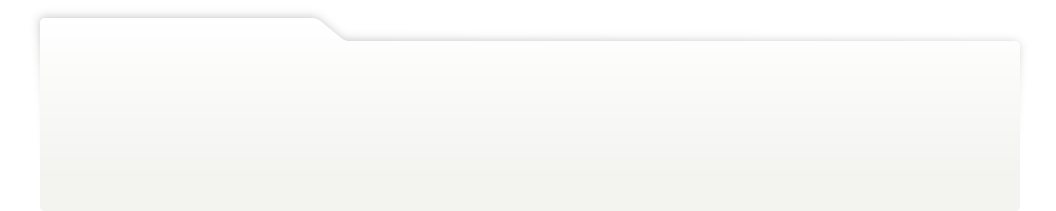
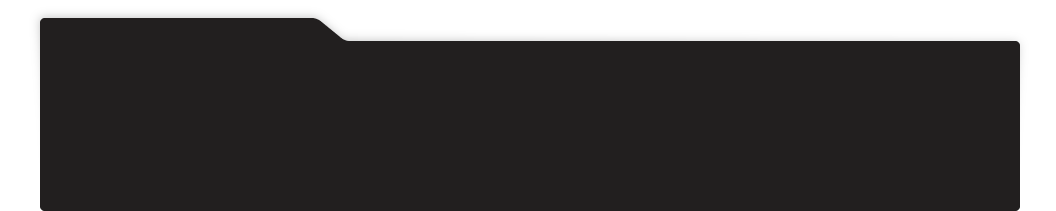
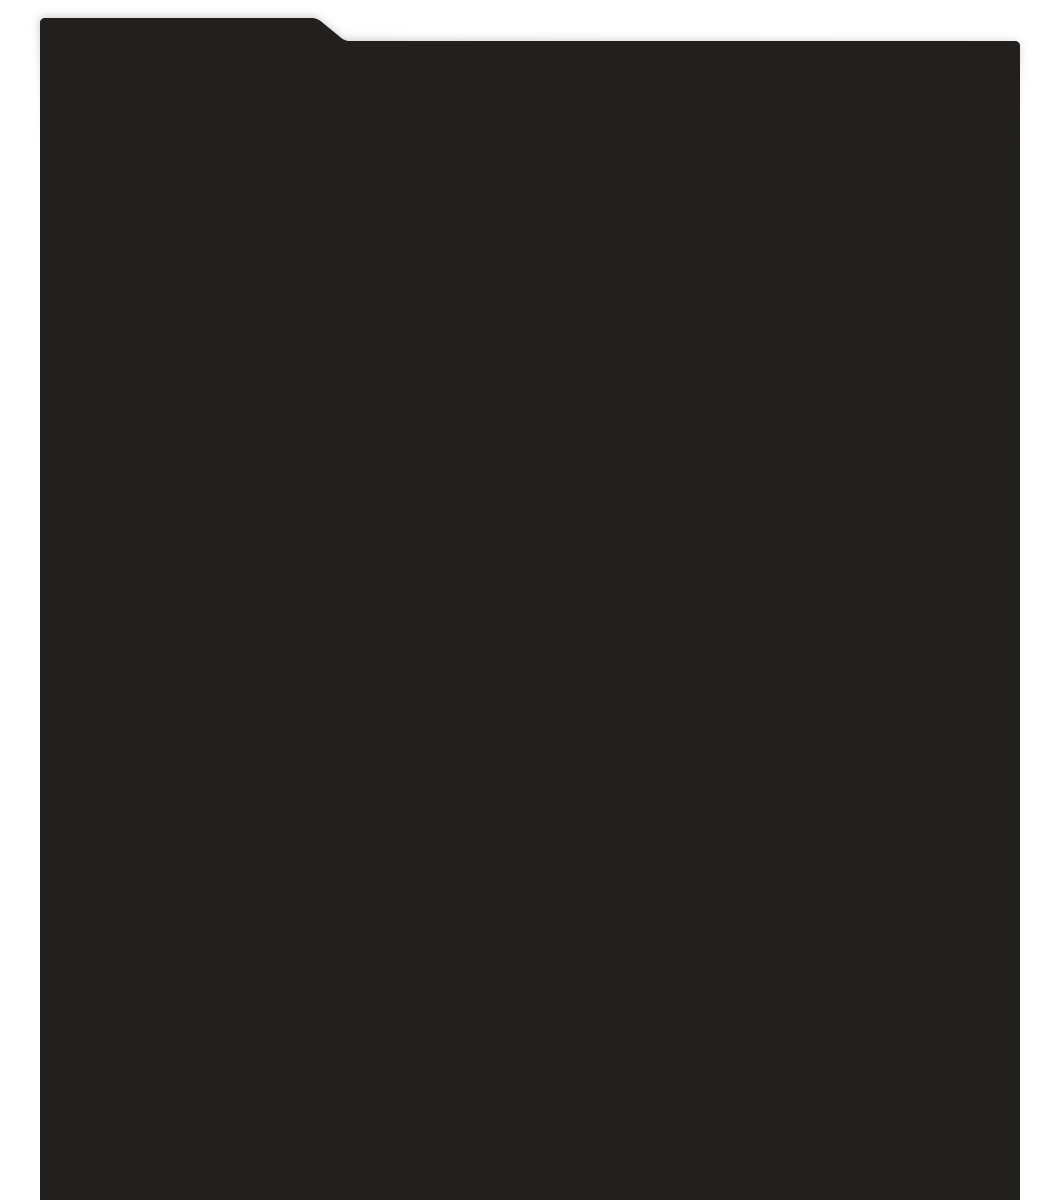
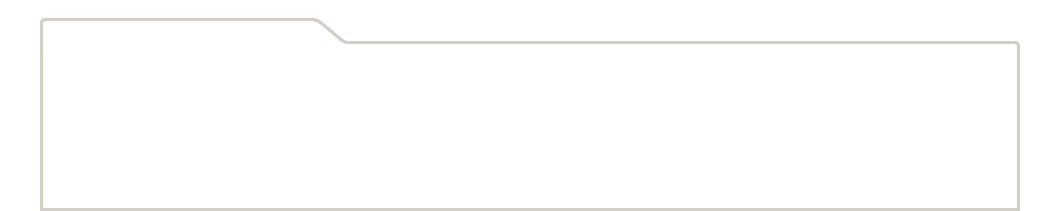
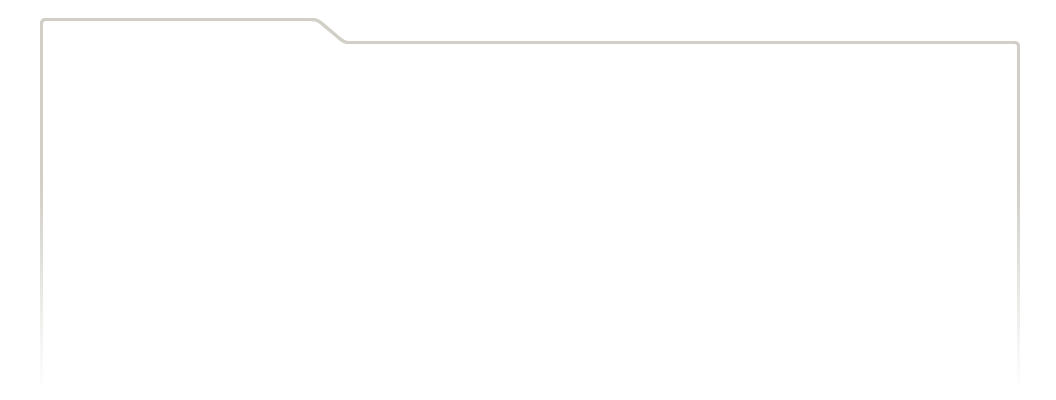
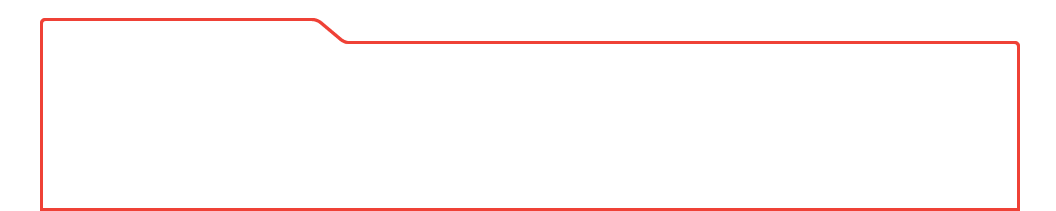
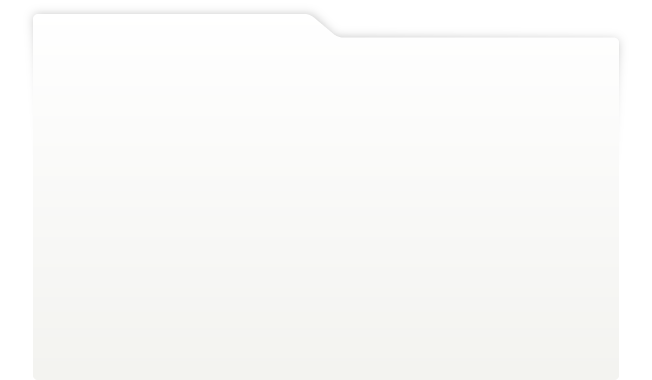
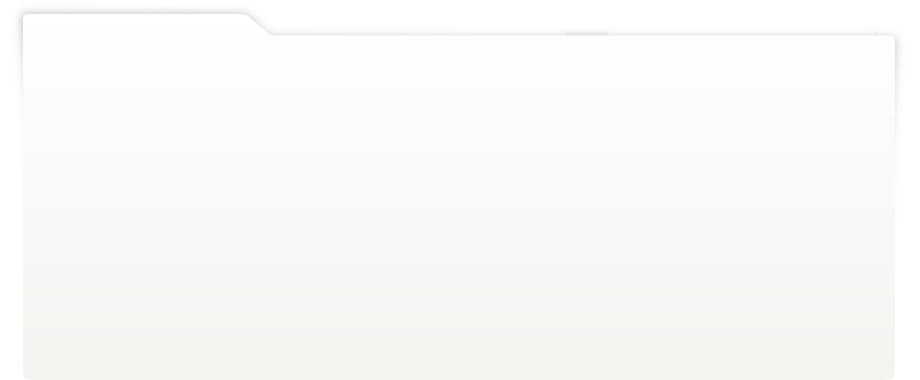
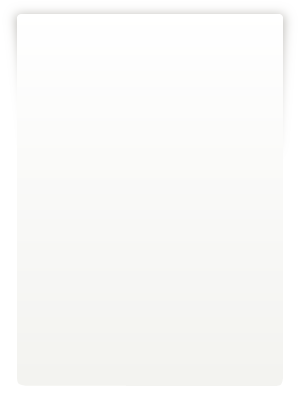
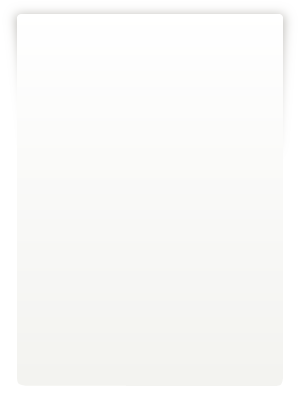
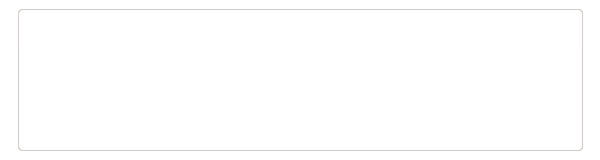
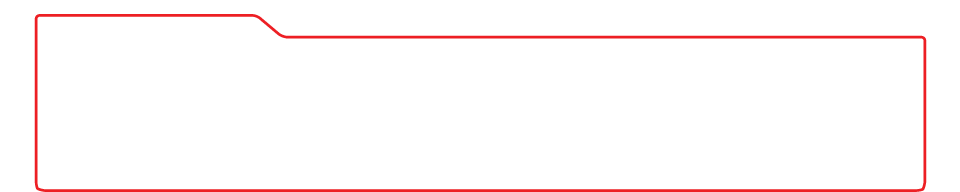
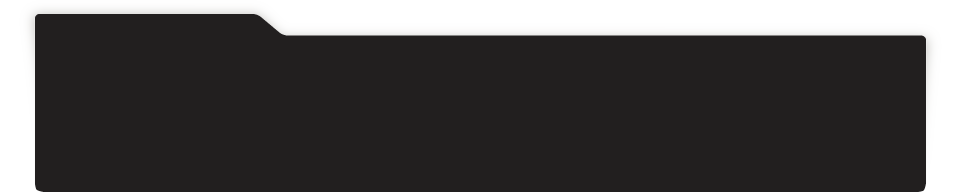
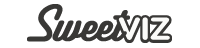
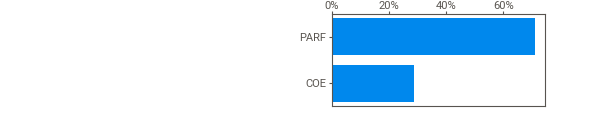
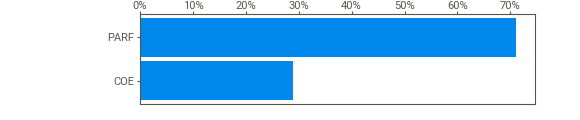
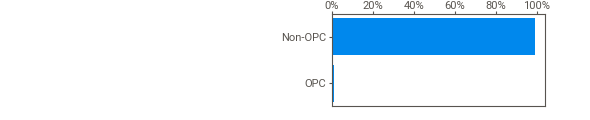
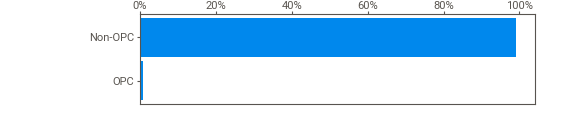
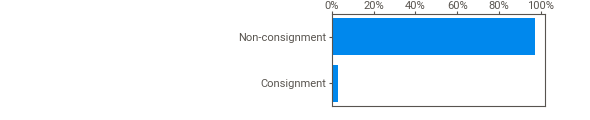
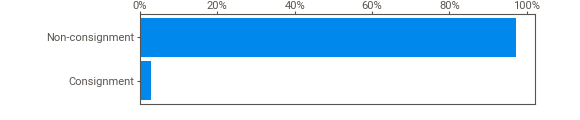
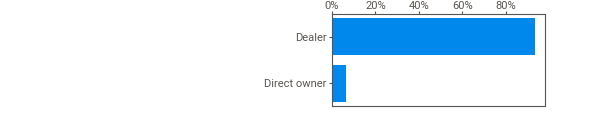
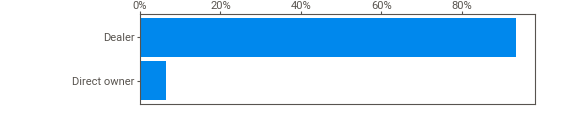
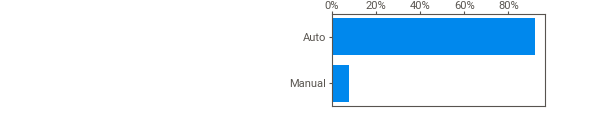
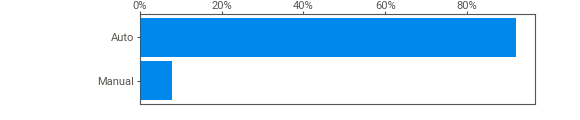
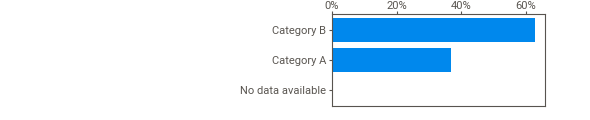
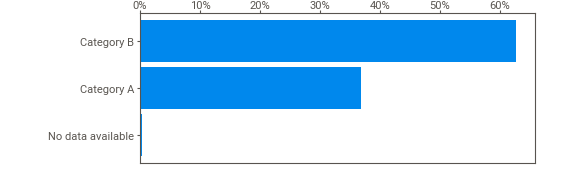
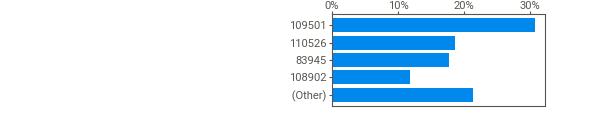
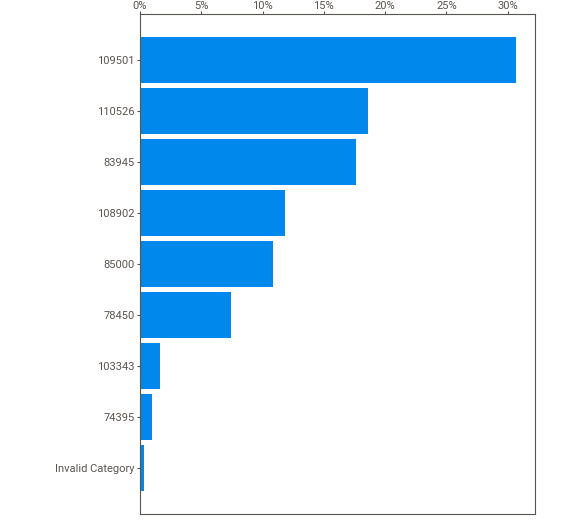
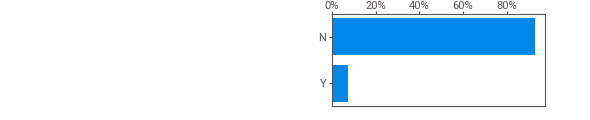
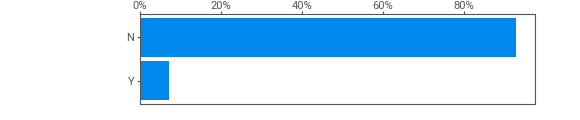
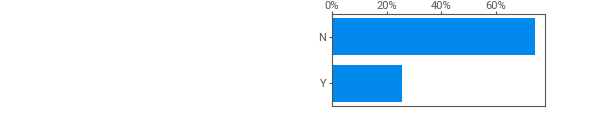
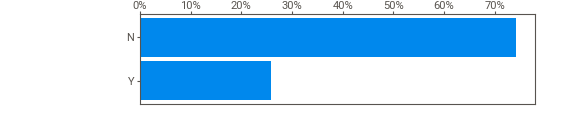
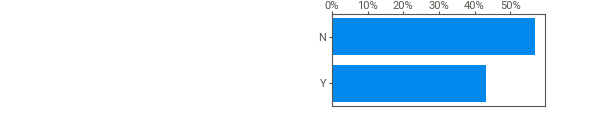
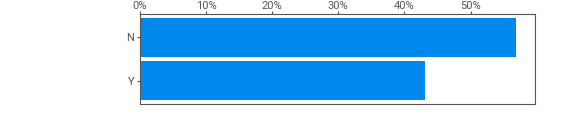
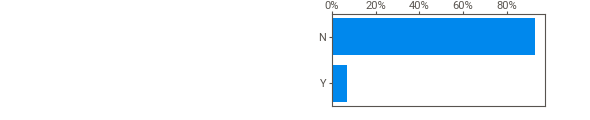
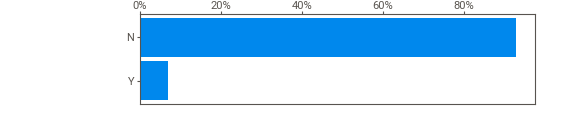
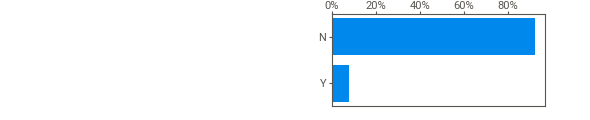
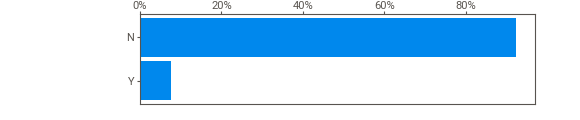
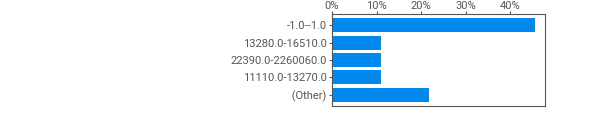
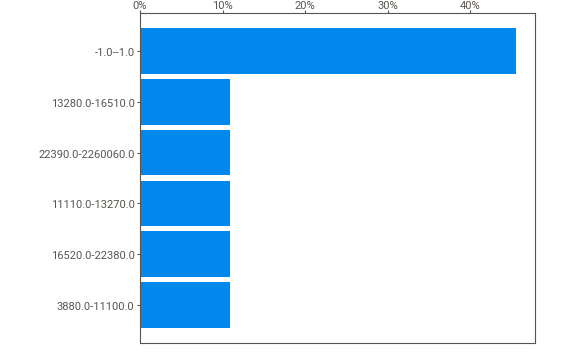
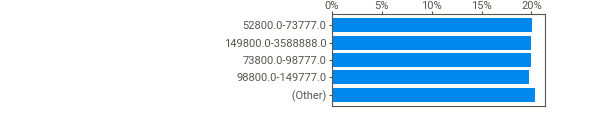
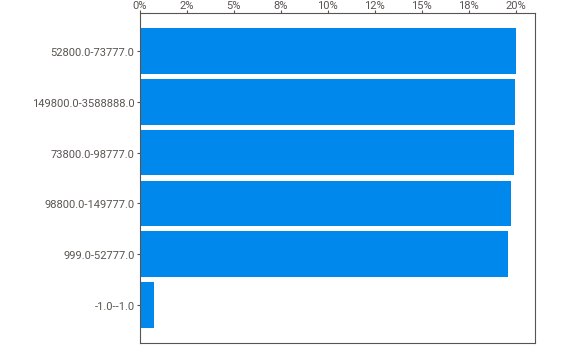
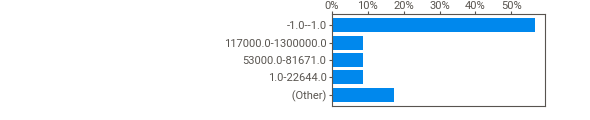
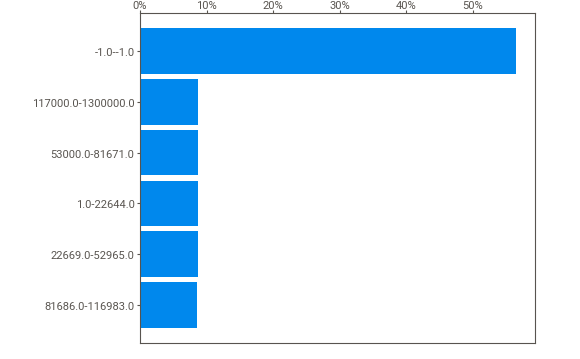
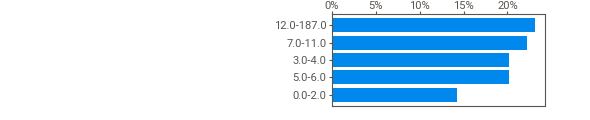
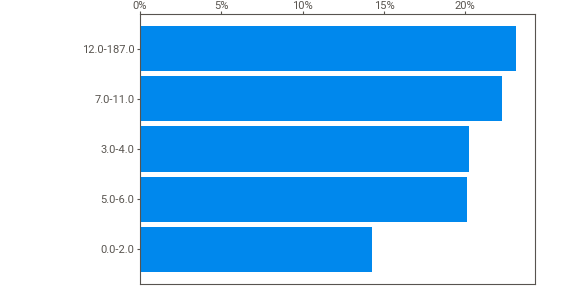
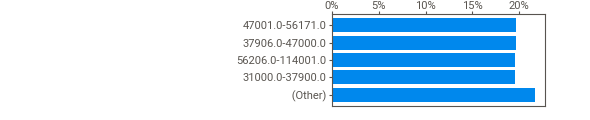
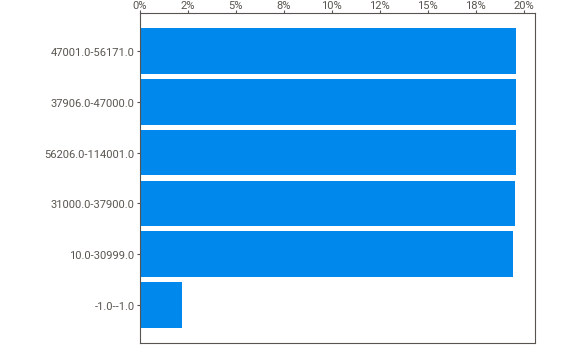
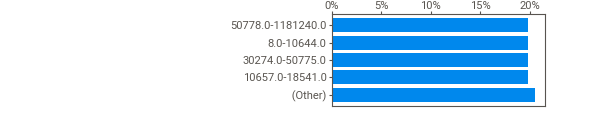
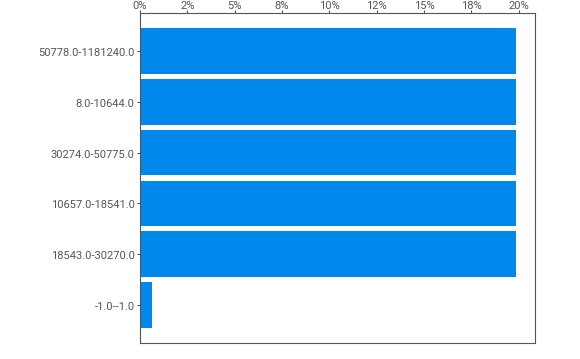
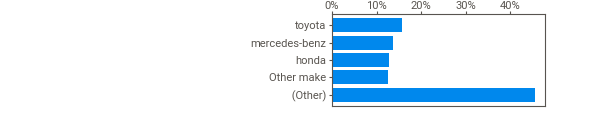
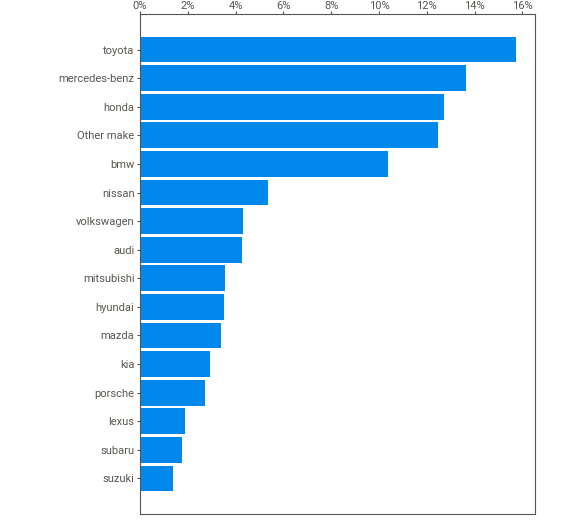
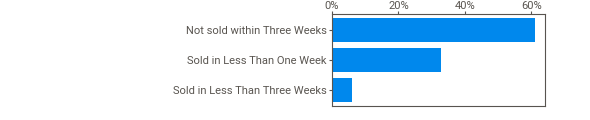
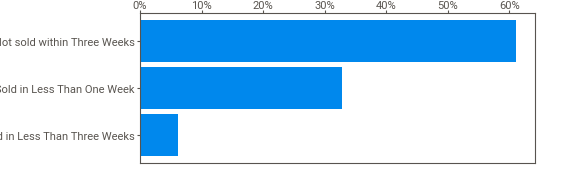
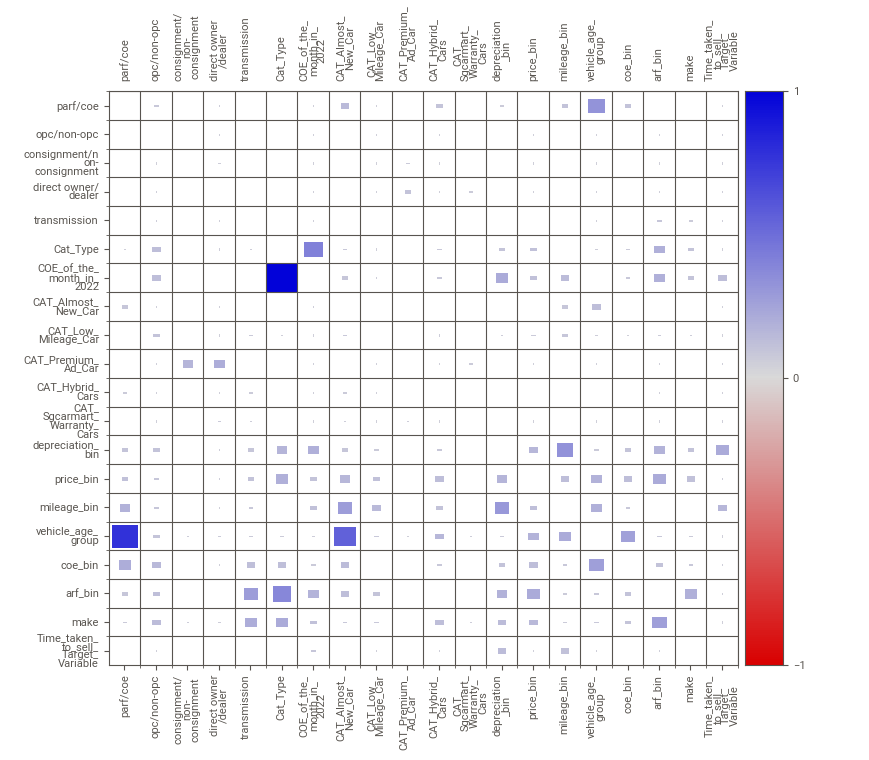
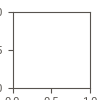

In [22]:
column_names = df.columns.tolist()
column_names=['parf/coe','opc/non-opc','consignment/non-consignment','direct owner/dealer','transmission','Cat_Type',
             'COE_of_the_month_in_2022','CAT_Almost_New_Car','CAT_Low_Mileage_Car','CAT_Premium_Ad_Car','CAT_Hybrid_Cars',
             'CAT_Sgcarmart_Warranty_Cars','depreciation_bin','price_bin', 'mileage_bin', 'vehicle_age_group','coe_bin','arf_bin','make',
             'Time_taken_to_sell_Target_Variable']
df_nn=df[column_names]
print(df_nn.columns.tolist())

analyze_report = sv.analyze(df_nn)
analyze_report.show_notebook()

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from matplotlib import pyplot as plt
from tensorflow import keras
from scipy.stats import uniform
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight

# Data preprocessing and modeling related functions
from keras.utils import np_utils, to_categorical
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

In [24]:
# Load your dataset and split it into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_nn.drop(['Time_taken_to_sell_Target_Variable'], axis=1), df_nn['Time_taken_to_sell_Target_Variable'], test_size=0.2, random_state=42)

# Create one-hot encoded variables for categorical columns
X_train_dummy = pd.get_dummies(X_train, drop_first=True)
X_test_dummy = pd.get_dummies(X_test, drop_first=True)

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert encoded target variable into one-hot encoded vectors
y_train_ohe = to_categorical(y_train_encoded)
y_test_ohe = to_categorical(y_test_encoded)


In [25]:
# Trial and error: Create dictionary to store intial test cases best test_accuracy
dict={}

Epoch 1/5
263/286 [==========================>...] - ETA: 0s - loss: 0.7160 - accuracy: 0.6647
Epoch 1: val_accuracy improved from -inf to 0.68906, saving model to best_model.h9


INFO:tensorflow:Assets written to: best_model.h9/assets


INFO:tensorflow:Assets written to: best_model.h9/assets


286/286 [==============================] - 3s 7ms/step - loss: 0.7120 - accuracy: 0.6672 - val_loss: 0.6791 - val_accuracy: 0.6891
Epoch 2/5
275/286 [===========================>..] - ETA: 0s - loss: 0.6531 - accuracy: 0.6890
Epoch 2: val_accuracy did not improve from 0.68906
286/286 [==============================] - 1s 2ms/step - loss: 0.6557 - accuracy: 0.6869 - val_loss: 0.6565 - val_accuracy: 0.6851
Epoch 3/5
276/286 [===========================>..] - ETA: 0s - loss: 0.6476 - accuracy: 0.6886
Epoch 3: val_accuracy improved from 0.68906 to 0.69465, saving model to best_model.h9


INFO:tensorflow:Assets written to: best_model.h9/assets


INFO:tensorflow:Assets written to: best_model.h9/assets


286/286 [==============================] - 1s 5ms/step - loss: 0.6462 - accuracy: 0.6897 - val_loss: 0.6597 - val_accuracy: 0.6947
Epoch 4/5
267/286 [===========================>..] - ETA: 0s - loss: 0.6405 - accuracy: 0.6925
Epoch 4: val_accuracy did not improve from 0.69465
286/286 [==============================] - 1s 2ms/step - loss: 0.6402 - accuracy: 0.6931 - val_loss: 0.6598 - val_accuracy: 0.6929
Epoch 5/5
282/286 [============================>.] - ETA: 0s - loss: 0.6324 - accuracy: 0.6985
Epoch 5: val_accuracy did not improve from 0.69465
286/286 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.6903
Validation accuracy (fold 1): 0.690
Train loss (fold 1): 0.657
Validation loss (fold 1): 0.663
Epoch 1/5
278/286 [============================>.] - ETA: 0s - loss: 0.6441 - accuracy: 0.6908
Epoch 1: val_accuracy improved from 0.69465 to 0.70613, saving model to best_model.h9


INFO:tensorflow:Assets written to: best_model.h9/assets


INFO:tensorflow:Assets written to: best_model.h9/assets


286/286 [==============================] - 2s 5ms/step - loss: 0.6445 - accuracy: 0.6906 - val_loss: 0.6238 - val_accuracy: 0.7061
Epoch 2/5
259/286 [==========================>...] - ETA: 0s - loss: 0.6325 - accuracy: 0.6985
Epoch 2: val_accuracy did not improve from 0.70613
286/286 [==============================] - 1s 2ms/step - loss: 0.6337 - accuracy: 0.6976 - val_loss: 0.6212 - val_accuracy: 0.7053
Epoch 3/5
260/286 [==========================>...] - ETA: 0s - loss: 0.6250 - accuracy: 0.7012
Epoch 3: val_accuracy did not improve from 0.70613
286/286 [==============================] - 1s 2ms/step - loss: 0.6271 - accuracy: 0.7008 - val_loss: 0.6296 - val_accuracy: 0.7022
Epoch 4/5
278/286 [============================>.] - ETA: 0s - loss: 0.6200 - accuracy: 0.7001
Epoch 4: val_accuracy did not improve from 0.70613
286/286 [==============================] - 1s 2ms/step - loss: 0.6207 - accuracy: 0.7001 - val_loss: 0.6299 - val_accuracy: 0.7019
Epoch 5/5
278/286 [===================

INFO:tensorflow:Assets written to: best_model.h9/assets


INFO:tensorflow:Assets written to: best_model.h9/assets


286/286 [==============================] - 1s 5ms/step - loss: 0.6210 - accuracy: 0.7019 - val_loss: 0.6013 - val_accuracy: 0.7096
Epoch 2/5
267/286 [===========================>..] - ETA: 0s - loss: 0.6047 - accuracy: 0.7137
Epoch 2: val_accuracy did not improve from 0.70963
286/286 [==============================] - 1s 2ms/step - loss: 0.6086 - accuracy: 0.7108 - val_loss: 0.6119 - val_accuracy: 0.7065
Epoch 3/5
270/286 [===========================>..] - ETA: 0s - loss: 0.5976 - accuracy: 0.7144
Epoch 3: val_accuracy did not improve from 0.70963
286/286 [==============================] - 1s 2ms/step - loss: 0.5975 - accuracy: 0.7143 - val_loss: 0.6219 - val_accuracy: 0.6993
Epoch 4/5
269/286 [===========================>..] - ETA: 0s - loss: 0.5870 - accuracy: 0.7207
Epoch 4: val_accuracy did not improve from 0.70963
286/286 [==============================] - 1s 2ms/step - loss: 0.5881 - accuracy: 0.7196 - val_loss: 0.6328 - val_accuracy: 0.6957
Epoch 5/5
267/286 [===================

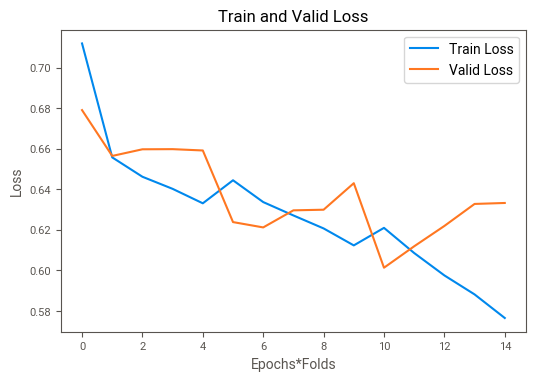

{'Adam/0.001/128/256/128/relu/relu/relu/without_dropout': [0.6868332602659653]}

In [26]:
# Define model architecture
model = keras.Sequential([
    # Input Layer
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_dummy.shape[1],)),
    
    # Hidden Layers
    keras.layers.Dense(128, activation='relu'),
    # Hidden Layers
    keras.layers.Dense(256, activation='relu'),
    # Hidden Layers
    keras.layers.Dense(128, activation='relu'),
    
    # Output Layer
    keras.layers.Dense(y_train_ohe.shape[1], activation='softmax')
])

# Define early stopping parameters
early_stopping_patience = 5 # Stop training if no improvement after 5 epochs
early_stopping_min_delta = 0.01 # Stop training if improvement is less than 0.01%
# Create EarlyStopping callback object
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, min_delta=early_stopping_min_delta)
# Define where to save the best model based on validation accuracy
best_model_path = 'best_model.h9'
# Create ModelCheckpoint callback object
model_checkpoint = ModelCheckpoint(best_model_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
                                  
# Compile model with categorical crossentropy loss and Adam optimizer with learning rate 0.001
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model with mini-batch and stratified kfold validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scores = []
losses = {'train': [], 'valid': []}  # Initialize dictionary to store losses

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_dummy, y_train_ohe.argmax(1))):
    
    # Split data into training and validation sets for this fold
    X_fold_train, X_fold_val = X_train_dummy.iloc[train_idx], X_train_dummy.iloc[val_idx]
    y_fold_train, y_fold_val = y_train_ohe[train_idx], y_train_ohe[val_idx]
    
    # Train model on this fold's training set
    
    history = model.fit(X_fold_train, y_fold_train, epochs=5, batch_size=64, validation_data=(X_fold_val, y_fold_val),
                    callbacks=[early_stopping, model_checkpoint])

    # Evaluate model on this fold's validation set
    score = model.evaluate(X_fold_val, y_fold_val)[1]
    scores.append(score)
    
    # Print current fold's validation accuracy
    print(f"Validation accuracy (fold {fold+1}): {score:.3f}")

    # Append train and validation losses for this fold to the losses dictionary
    losses['train'].extend(history.history['loss'])
    losses['valid'].extend(history.history['val_loss'])
    
    # Print current fold's train and validation losses
    print(f"Train loss (fold {fold+1}): {np.mean(losses['train'][-len(history.history['loss']):]):.3f}")
    print(f"Validation loss (fold {fold+1}): {np.mean(losses['valid'][-len(history.history['val_loss']):]):.3f}")

# Calculate mean and standard deviation of validation accuracies across all folds
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"Mean validation accuracy: {mean_score:.3f}")
print(f"Standard deviation of validation accuracies: {std_score:.3f}")
# Load the saved best model
best_model = load_model(best_model_path)
# Evaluate final model on test set
test_pred = best_model.predict(X_test_dummy)
test_accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), np.argmax(test_pred, axis=1))
print(f"Test set accuracy score: {test_accuracy:.3f}")
# Plot train and test losses against epochs
fig, ax = plt.subplots()
ax.plot(losses['train'], label='Train Loss')
ax.plot(losses['valid'], label='Valid Loss')
ax.set_xlabel('Epochs*Folds')
ax.set_ylabel('Loss')
ax.set_title('Train and Valid Loss')
ax.legend()
plt.show()



dict["Adam/0.001/128/256/128/relu/relu/relu/without_dropout"]=[test_accuracy]
dict


Epoch 1/5
283/286 [============================>.] - ETA: 0s - loss: 0.7341 - accuracy: 0.6565
Epoch 1: val_accuracy improved from -inf to 0.68829, saving model to best_model.h1


INFO:tensorflow:Assets written to: best_model.h1/assets


INFO:tensorflow:Assets written to: best_model.h1/assets


286/286 [==============================] - 3s 7ms/step - loss: 0.7336 - accuracy: 0.6567 - val_loss: 0.6745 - val_accuracy: 0.6883
Epoch 2/5
266/286 [==========================>...] - ETA: 0s - loss: 0.6715 - accuracy: 0.6839
Epoch 2: val_accuracy improved from 0.68829 to 0.69082, saving model to best_model.h1


INFO:tensorflow:Assets written to: best_model.h1/assets


INFO:tensorflow:Assets written to: best_model.h1/assets


286/286 [==============================] - 2s 6ms/step - loss: 0.6706 - accuracy: 0.6840 - val_loss: 0.6573 - val_accuracy: 0.6908
Epoch 3/5
284/286 [============================>.] - ETA: 0s - loss: 0.6580 - accuracy: 0.6890
Epoch 3: val_accuracy improved from 0.69082 to 0.69136, saving model to best_model.h1


INFO:tensorflow:Assets written to: best_model.h1/assets


INFO:tensorflow:Assets written to: best_model.h1/assets


286/286 [==============================] - 2s 6ms/step - loss: 0.6583 - accuracy: 0.6889 - val_loss: 0.6541 - val_accuracy: 0.6914
Epoch 4/5
267/286 [===========================>..] - ETA: 0s - loss: 0.6513 - accuracy: 0.6932
Epoch 4: val_accuracy improved from 0.69136 to 0.69443, saving model to best_model.h1


INFO:tensorflow:Assets written to: best_model.h1/assets


INFO:tensorflow:Assets written to: best_model.h1/assets


286/286 [==============================] - 2s 7ms/step - loss: 0.6518 - accuracy: 0.6934 - val_loss: 0.6497 - val_accuracy: 0.6944
Epoch 5/5
272/286 [===========================>..] - ETA: 0s - loss: 0.6415 - accuracy: 0.6964
Epoch 5: val_accuracy improved from 0.69443 to 0.69454, saving model to best_model.h1


INFO:tensorflow:Assets written to: best_model.h1/assets


INFO:tensorflow:Assets written to: best_model.h1/assets


286/286 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.6945
Validation accuracy (fold 1): 0.695
Train loss (fold 1): 0.672
Validation loss (fold 1): 0.658
Epoch 1/5
274/286 [===========================>..] - ETA: 0s - loss: 0.6564 - accuracy: 0.6878
Epoch 1: val_accuracy improved from 0.69454 to 0.70679, saving model to best_model.h1


INFO:tensorflow:Assets written to: best_model.h1/assets


INFO:tensorflow:Assets written to: best_model.h1/assets


286/286 [==============================] - 2s 6ms/step - loss: 0.6551 - accuracy: 0.6888 - val_loss: 0.6242 - val_accuracy: 0.7068
Epoch 2/5
283/286 [============================>.] - ETA: 0s - loss: 0.6458 - accuracy: 0.6893
Epoch 2: val_accuracy did not improve from 0.70679
286/286 [==============================] - 1s 3ms/step - loss: 0.6456 - accuracy: 0.6894 - val_loss: 0.6278 - val_accuracy: 0.7066
Epoch 3/5
269/286 [===========================>..] - ETA: 0s - loss: 0.6411 - accuracy: 0.6973
Epoch 3: val_accuracy did not improve from 0.70679
286/286 [==============================] - 1s 3ms/step - loss: 0.6405 - accuracy: 0.6971 - val_loss: 0.6291 - val_accuracy: 0.7066
Epoch 4/5
272/286 [===========================>..] - ETA: 0s - loss: 0.6326 - accuracy: 0.7007
Epoch 4: val_accuracy did not improve from 0.70679
286/286 [==============================] - 1s 3ms/step - loss: 0.6322 - accuracy: 0.7003 - val_loss: 0.6333 - val_accuracy: 0.7008
Epoch 5/5
281/286 [===================

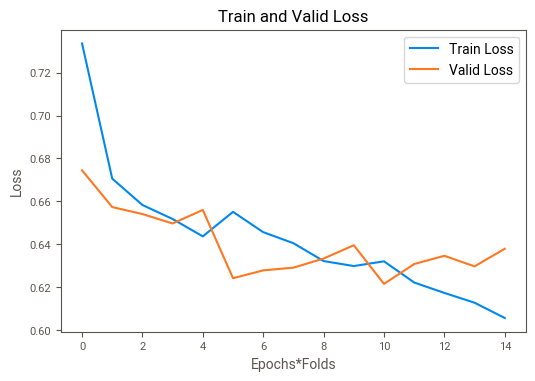

{'Adam/0.001/128/256/128/relu/relu/relu/without_dropout': [0.6868332602659653],
 'Adam/0.001/128/256/128/relu/relu/relu': [0.6910711676165424]}

In [27]:
# Define model architecture
model = keras.Sequential([
    # Input Layer
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_dummy.shape[1],)),
    
    # Hidden Layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    
    # Output Layer
    keras.layers.Dense(y_train_ohe.shape[1], activation='softmax')
])

# Define early stopping parameters
early_stopping_patience = 5 # Stop training if no improvement after 5 epochs
early_stopping_min_delta = 0.01 # Stop training if improvement is less than 0.01%
# Create EarlyStopping callback object
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, min_delta=early_stopping_min_delta)
# Define where to save the best model based on validation accuracy
best_model_path = 'best_model.h1'
# Create ModelCheckpoint callback object
model_checkpoint = ModelCheckpoint(best_model_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
                                  
# Compile model with categorical crossentropy loss and Adam optimizer with learning rate 0.001
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model with mini-batch and stratified kfold validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scores = []
losses = {'train': [], 'valid': []}  # Initialize dictionary to store losses

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_dummy, y_train_ohe.argmax(1))):
    
    # Split data into training and validation sets for this fold
    X_fold_train, X_fold_val = X_train_dummy.iloc[train_idx], X_train_dummy.iloc[val_idx]
    y_fold_train, y_fold_val = y_train_ohe[train_idx], y_train_ohe[val_idx]
    
    # Train model on this fold's training set
    
    history = model.fit(X_fold_train, y_fold_train, epochs=5, batch_size=64, validation_data=(X_fold_val, y_fold_val),
                    callbacks=[early_stopping, model_checkpoint])

    # Evaluate model on this fold's validation set
    score = model.evaluate(X_fold_val, y_fold_val)[1]
    scores.append(score)
    
    # Print current fold's validation accuracy
    print(f"Validation accuracy (fold {fold+1}): {score:.3f}")

    # Append train and validation losses for this fold to the losses dictionary
    losses['train'].extend(history.history['loss'])
    losses['valid'].extend(history.history['val_loss'])
    
    # Print current fold's train and validation losses
    print(f"Train loss (fold {fold+1}): {np.mean(losses['train'][-len(history.history['loss']):]):.3f}")
    print(f"Validation loss (fold {fold+1}): {np.mean(losses['valid'][-len(history.history['val_loss']):]):.3f}")

# Calculate mean and standard deviation of validation accuracies across all folds
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"Mean validation accuracy: {mean_score:.3f}")
print(f"Standard deviation of validation accuracies: {std_score:.3f}")
# Load the saved best model
best_model = load_model(best_model_path)
# Evaluate final model on test set
test_pred = best_model.predict(X_test_dummy)
test_accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), np.argmax(test_pred, axis=1))
print(f"Test set accuracy score: {test_accuracy:.3f}")
# Plot train and test losses against epochs
fig, ax = plt.subplots()
ax.plot(losses['train'], label='Train Loss')
ax.plot(losses['valid'], label='Valid Loss')
ax.set_xlabel('Epochs*Folds')
ax.set_ylabel('Loss')
ax.set_title('Train and Valid Loss')
ax.legend()
plt.show()

m1_losses=losses

dict["Adam/0.001/128/256/128/relu/relu/relu"]=[test_accuracy]
dict


Epoch 1/5
280/286 [============================>.] - ETA: 0s - loss: 0.8353 - accuracy: 0.6137
Epoch 1: val_accuracy improved from -inf to 0.61333, saving model to best_model.h2


INFO:tensorflow:Assets written to: best_model.h2/assets


INFO:tensorflow:Assets written to: best_model.h2/assets


286/286 [==============================] - 3s 7ms/step - loss: 0.8346 - accuracy: 0.6133 - val_loss: 0.7752 - val_accuracy: 0.6133
Epoch 2/5
282/286 [============================>.] - ETA: 0s - loss: 0.7670 - accuracy: 0.6292
Epoch 2: val_accuracy improved from 0.61333 to 0.67174, saving model to best_model.h2


INFO:tensorflow:Assets written to: best_model.h2/assets


INFO:tensorflow:Assets written to: best_model.h2/assets


286/286 [==============================] - 2s 6ms/step - loss: 0.7668 - accuracy: 0.6289 - val_loss: 0.7137 - val_accuracy: 0.6717
Epoch 3/5
283/286 [============================>.] - ETA: 0s - loss: 0.7201 - accuracy: 0.6643
Epoch 3: val_accuracy improved from 0.67174 to 0.68786, saving model to best_model.h2


INFO:tensorflow:Assets written to: best_model.h2/assets


INFO:tensorflow:Assets written to: best_model.h2/assets


286/286 [==============================] - 2s 6ms/step - loss: 0.7205 - accuracy: 0.6640 - val_loss: 0.6864 - val_accuracy: 0.6879
Epoch 4/5
271/286 [===========================>..] - ETA: 0s - loss: 0.6993 - accuracy: 0.6776
Epoch 4: val_accuracy improved from 0.68786 to 0.69191, saving model to best_model.h2


INFO:tensorflow:Assets written to: best_model.h2/assets


INFO:tensorflow:Assets written to: best_model.h2/assets


286/286 [==============================] - 2s 6ms/step - loss: 0.7001 - accuracy: 0.6776 - val_loss: 0.6766 - val_accuracy: 0.6919
Epoch 5/5
271/286 [===========================>..] - ETA: 0s - loss: 0.6866 - accuracy: 0.6805
Epoch 5: val_accuracy did not improve from 0.69191
286/286 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.6917
Validation accuracy (fold 1): 0.692
Train loss (fold 1): 0.742
Validation loss (fold 1): 0.705
Epoch 1/5
278/286 [============================>.] - ETA: 0s - loss: 0.6870 - accuracy: 0.6814
Epoch 1: val_accuracy improved from 0.69191 to 0.69758, saving model to best_model.h2


INFO:tensorflow:Assets written to: best_model.h2/assets


INFO:tensorflow:Assets written to: best_model.h2/assets


286/286 [==============================] - 2s 6ms/step - loss: 0.6871 - accuracy: 0.6824 - val_loss: 0.6546 - val_accuracy: 0.6976
Epoch 2/5
277/286 [============================>.] - ETA: 0s - loss: 0.6779 - accuracy: 0.6873
Epoch 2: val_accuracy did not improve from 0.69758
286/286 [==============================] - 1s 3ms/step - loss: 0.6782 - accuracy: 0.6871 - val_loss: 0.6525 - val_accuracy: 0.6972
Epoch 3/5
285/286 [============================>.] - ETA: 0s - loss: 0.6763 - accuracy: 0.6843
Epoch 3: val_accuracy did not improve from 0.69758
286/286 [==============================] - 1s 3ms/step - loss: 0.6762 - accuracy: 0.6844 - val_loss: 0.6514 - val_accuracy: 0.6974
Epoch 4/5
285/286 [============================>.] - ETA: 0s - loss: 0.6729 - accuracy: 0.6836
Epoch 4: val_accuracy improved from 0.69758 to 0.69922, saving model to best_model.h2


INFO:tensorflow:Assets written to: best_model.h2/assets


INFO:tensorflow:Assets written to: best_model.h2/assets


286/286 [==============================] - 2s 7ms/step - loss: 0.6729 - accuracy: 0.6836 - val_loss: 0.6503 - val_accuracy: 0.6992
Epoch 5/5
270/286 [===========================>..] - ETA: 0s - loss: 0.6673 - accuracy: 0.6877
Epoch 5: val_accuracy improved from 0.69922 to 0.69988, saving model to best_model.h2


INFO:tensorflow:Assets written to: best_model.h2/assets


INFO:tensorflow:Assets written to: best_model.h2/assets


286/286 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.6999
Validation accuracy (fold 2): 0.700
Train loss (fold 2): 0.676
Validation loss (fold 2): 0.651
Epoch 1/5
271/286 [===========================>..] - ETA: 0s - loss: 0.6592 - accuracy: 0.6942
Epoch 1: val_accuracy did not improve from 0.69988
286/286 [==============================] - 1s 3ms/step - loss: 0.6590 - accuracy: 0.6941 - val_loss: 0.6599 - val_accuracy: 0.6874
Epoch 2/5
276/286 [===========================>..] - ETA: 0s - loss: 0.6557 - accuracy: 0.6940
Epoch 2: val_accuracy did not improve from 0.69988
286/286 [==============================] - 1s 3ms/step - loss: 0.6557 - accuracy: 0.6941 - val_loss: 0.6586 - val_accuracy: 0.6879
Epoch 3/5
278/286 [============================>.] - ETA: 0s - loss: 0.6509 - accuracy: 0.6969
Epoch 3: val_accuracy did not improve from 0.69988
286/286 [==============================] - 1s 3ms/step - loss: 0.6514 - accuracy: 0.6972 - val_loss: 0.6583 - val_ac

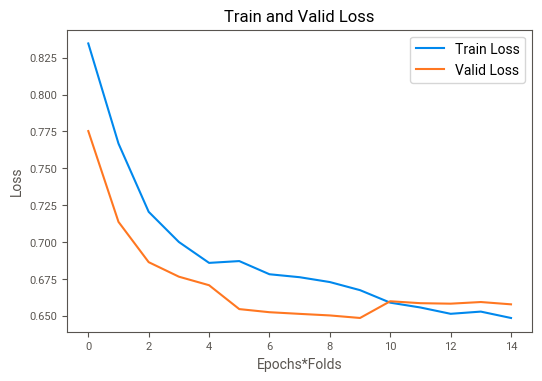

{'Adam/0.001/128/256/128/relu/relu/relu/without_dropout': [0.6868332602659653],
 'Adam/0.001/128/256/128/relu/relu/relu': [0.6910711676165424],
 'Adam/0.0001/128/256/128/relu/relu/relu': [0.6882946076282332]}

In [28]:
# Define model architecture
model = keras.Sequential([
    # Input Layer
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_dummy.shape[1],)),
    
    # Hidden Layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    
    # Output Layer
    keras.layers.Dense(y_train_ohe.shape[1], activation='softmax')
])

# Define early stopping parameters
early_stopping_patience = 5 # Stop training if no improvement after 5 epochs
early_stopping_min_delta = 0.01 # Stop training if improvement is less than 0.01%
# Create EarlyStopping callback object
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, min_delta=early_stopping_min_delta)
# Define where to save the best model based on validation accuracy
best_model_path = 'best_model.h2'
# Create ModelCheckpoint callback object
model_checkpoint = ModelCheckpoint(best_model_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
                                  
# Compile model with categorical crossentropy loss and Adam optimizer with learning rate 0.001
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train model with mini-batch and stratified kfold validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scores = []
losses = {'train': [], 'valid': []}  # Initialize dictionary to store losses

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_dummy, y_train_ohe.argmax(1))):
    
    # Split data into training and validation sets for this fold
    X_fold_train, X_fold_val = X_train_dummy.iloc[train_idx], X_train_dummy.iloc[val_idx]
    y_fold_train, y_fold_val = y_train_ohe[train_idx], y_train_ohe[val_idx]
    
    # Train model on this fold's training set
    
    history = model.fit(X_fold_train, y_fold_train, epochs=5, batch_size=64, validation_data=(X_fold_val, y_fold_val),
                    callbacks=[early_stopping, model_checkpoint])

    # Evaluate model on this fold's validation set
    score = model.evaluate(X_fold_val, y_fold_val)[1]
    scores.append(score)
    
    # Print current fold's validation accuracy
    print(f"Validation accuracy (fold {fold+1}): {score:.3f}")

    # Append train and validation losses for this fold to the losses dictionary
    losses['train'].extend(history.history['loss'])
    losses['valid'].extend(history.history['val_loss'])
    
    # Print current fold's train and validation losses
    print(f"Train loss (fold {fold+1}): {np.mean(losses['train'][-len(history.history['loss']):]):.3f}")
    print(f"Validation loss (fold {fold+1}): {np.mean(losses['valid'][-len(history.history['val_loss']):]):.3f}")

# Calculate mean and standard deviation of validation accuracies across all folds
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"Mean validation accuracy: {mean_score:.3f}")
print(f"Standard deviation of validation accuracies: {std_score:.3f}")
# Load the saved best model
best_model = load_model(best_model_path)
# Evaluate final model on test set
test_pred = best_model.predict(X_test_dummy)
test_accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), np.argmax(test_pred, axis=1))
print(f"Test set accuracy score: {test_accuracy:.3f}")
# Plot train and test losses against epochs
fig, ax = plt.subplots()
ax.plot(losses['train'], label='Train Loss')
ax.plot(losses['valid'], label='Valid Loss')
ax.set_xlabel('Epochs*Folds')
ax.set_ylabel('Loss')
ax.set_title('Train and Valid Loss')
ax.legend()
plt.show()


m2_losses=losses

dict["Adam/0.0001/128/256/128/relu/relu/relu"]=[test_accuracy]
dict


Epoch 1/5
279/286 [============================>.] - ETA: 0s - loss: 1.0579 - accuracy: 0.4236
Epoch 1: val_accuracy improved from -inf to 0.61015, saving model to best_model.h3


INFO:tensorflow:Assets written to: best_model.h3/assets


INFO:tensorflow:Assets written to: best_model.h3/assets


286/286 [==============================] - 6s 16ms/step - loss: 1.0563 - accuracy: 0.4259 - val_loss: 0.9856 - val_accuracy: 0.6101
Epoch 2/5
281/286 [============================>.] - ETA: 0s - loss: 0.9513 - accuracy: 0.5887
Epoch 2: val_accuracy improved from 0.61015 to 0.61322, saving model to best_model.h3


INFO:tensorflow:Assets written to: best_model.h3/assets


INFO:tensorflow:Assets written to: best_model.h3/assets


286/286 [==============================] - 3s 12ms/step - loss: 0.9510 - accuracy: 0.5889 - val_loss: 0.9116 - val_accuracy: 0.6132
Epoch 3/5
277/286 [============================>.] - ETA: 0s - loss: 0.8967 - accuracy: 0.6105
Epoch 3: val_accuracy did not improve from 0.61322
286/286 [==============================] - 1s 4ms/step - loss: 0.8961 - accuracy: 0.6109 - val_loss: 0.8731 - val_accuracy: 0.6132
Epoch 4/5
280/286 [============================>.] - ETA: 0s - loss: 0.8694 - accuracy: 0.6124
Epoch 4: val_accuracy did not improve from 0.61322
286/286 [==============================] - 1s 4ms/step - loss: 0.8691 - accuracy: 0.6124 - val_loss: 0.8538 - val_accuracy: 0.6132
Epoch 5/5
281/286 [============================>.] - ETA: 0s - loss: 0.8540 - accuracy: 0.6131
Epoch 5: val_accuracy did not improve from 0.61322
286/286 [==============================] - 1s 2ms/step - loss: 0.8437 - accuracy: 0.6132
Validation accuracy (fold 1): 0.613
Train loss (fold 1): 0.925
Validation loss 

INFO:tensorflow:Assets written to: best_model.h3/assets


INFO:tensorflow:Assets written to: best_model.h3/assets


286/286 [==============================] - 2s 8ms/step - loss: 0.8458 - accuracy: 0.6129 - val_loss: 0.8366 - val_accuracy: 0.6133
Epoch 2/5
268/286 [===========================>..] - ETA: 0s - loss: 0.8410 - accuracy: 0.6121
Epoch 2: val_accuracy did not improve from 0.61329
286/286 [==============================] - 1s 3ms/step - loss: 0.8412 - accuracy: 0.6133 - val_loss: 0.8328 - val_accuracy: 0.6133
Epoch 3/5
277/286 [============================>.] - ETA: 0s - loss: 0.8421 - accuracy: 0.6121
Epoch 3: val_accuracy did not improve from 0.61329
286/286 [==============================] - 1s 3ms/step - loss: 0.8408 - accuracy: 0.6131 - val_loss: 0.8301 - val_accuracy: 0.6133
Epoch 4/5
281/286 [============================>.] - ETA: 0s - loss: 0.8379 - accuracy: 0.6129
Epoch 4: val_accuracy did not improve from 0.61329
286/286 [==============================] - 1s 3ms/step - loss: 0.8377 - accuracy: 0.6128 - val_loss: 0.8280 - val_accuracy: 0.6133
Epoch 5/5
269/286 [===================

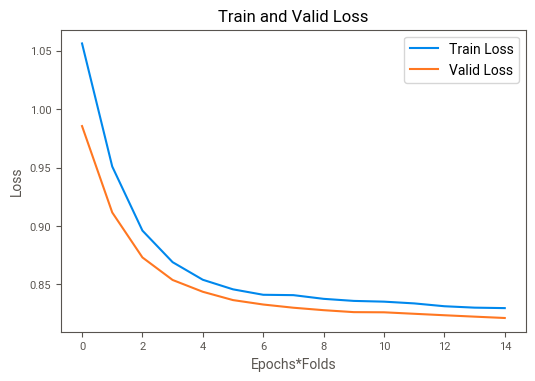

{'Adam/0.001/128/256/128/relu/relu/relu/without_dropout': [0.6868332602659653],
 'Adam/0.001/128/256/128/relu/relu/relu': [0.6910711676165424],
 'Adam/0.0001/128/256/128/relu/relu/relu': [0.6882946076282332],
 'SGD/0.001/128/256/128/relu/relu/relu': [0.6028057869355545]}

In [29]:
# Define model architecture
model = keras.Sequential([
    # Input Layer
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_dummy.shape[1],)),
    
    # Hidden Layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    
    # Output Layer
    keras.layers.Dense(y_train_ohe.shape[1], activation='softmax')
])

# Define early stopping parameters
early_stopping_patience = 5 # Stop training if no improvement after 5 epochs
early_stopping_min_delta = 0.01 # Stop training if improvement is less than 0.01%
# Create EarlyStopping callback object
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, min_delta=early_stopping_min_delta)
# Define where to save the best model based on validation accuracy
best_model_path = 'best_model.h3'
# Create ModelCheckpoint callback object
model_checkpoint = ModelCheckpoint(best_model_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
                                  
# Compile model with categorical crossentropy loss and Adam optimizer with learning rate 0.001
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])

# Train model with mini-batch and stratified kfold validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scores = []
losses = {'train': [], 'valid': []}  # Initialize dictionary to store losses

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_dummy, y_train_ohe.argmax(1))):
    
    # Split data into training and validation sets for this fold
    X_fold_train, X_fold_val = X_train_dummy.iloc[train_idx], X_train_dummy.iloc[val_idx]
    y_fold_train, y_fold_val = y_train_ohe[train_idx], y_train_ohe[val_idx]
    
    # Train model on this fold's training set
    
    history = model.fit(X_fold_train, y_fold_train, epochs=5, batch_size=64, validation_data=(X_fold_val, y_fold_val),
                    callbacks=[early_stopping, model_checkpoint])

    # Evaluate model on this fold's validation set
    score = model.evaluate(X_fold_val, y_fold_val)[1]
    scores.append(score)
    
    # Print current fold's validation accuracy
    print(f"Validation accuracy (fold {fold+1}): {score:.3f}")

    # Append train and validation losses for this fold to the losses dictionary
    losses['train'].extend(history.history['loss'])
    losses['valid'].extend(history.history['val_loss'])
    
    # Print current fold's train and validation losses
    print(f"Train loss (fold {fold+1}): {np.mean(losses['train'][-len(history.history['loss']):]):.3f}")
    print(f"Validation loss (fold {fold+1}): {np.mean(losses['valid'][-len(history.history['val_loss']):]):.3f}")

# Calculate mean and standard deviation of validation accuracies across all folds
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"Mean validation accuracy: {mean_score:.3f}")
print(f"Standard deviation of validation accuracies: {std_score:.3f}")
# Load the saved best model
best_model = load_model(best_model_path)
# Evaluate final model on test set
test_pred = best_model.predict(X_test_dummy)
test_accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), np.argmax(test_pred, axis=1))
print(f"Test set accuracy score: {test_accuracy:.3f}")
# Plot train and test losses against epochs
fig, ax = plt.subplots()
ax.plot(losses['train'], label='Train Loss')
ax.plot(losses['valid'], label='Valid Loss')
ax.set_xlabel('Epochs*Folds')
ax.set_ylabel('Loss')
ax.set_title('Train and Valid Loss')
ax.legend()
plt.show()


m3_losses=losses

dict["SGD/0.001/128/256/128/relu/relu/relu"]=[test_accuracy]
dict


Epoch 1/5
282/286 [============================>.] - ETA: 0s - loss: 1.1504 - accuracy: 0.1943
Epoch 1: val_accuracy improved from -inf to 0.17361, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4/assets


INFO:tensorflow:Assets written to: best_model.h4/assets


286/286 [==============================] - 3s 7ms/step - loss: 1.1502 - accuracy: 0.1948 - val_loss: 1.1305 - val_accuracy: 0.1736
Epoch 2/5
264/286 [==========================>...] - ETA: 0s - loss: 1.1318 - accuracy: 0.2433
Epoch 2: val_accuracy improved from 0.17361 to 0.26228, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4/assets


INFO:tensorflow:Assets written to: best_model.h4/assets


286/286 [==============================] - 2s 6ms/step - loss: 1.1311 - accuracy: 0.2449 - val_loss: 1.1123 - val_accuracy: 0.2623
Epoch 3/5
273/286 [===========================>..] - ETA: 0s - loss: 1.1152 - accuracy: 0.2888
Epoch 3: val_accuracy improved from 0.26228 to 0.36464, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4/assets


INFO:tensorflow:Assets written to: best_model.h4/assets


286/286 [==============================] - 2s 6ms/step - loss: 1.1148 - accuracy: 0.2899 - val_loss: 1.0956 - val_accuracy: 0.3646
Epoch 4/5
284/286 [============================>.] - ETA: 0s - loss: 1.0967 - accuracy: 0.3576
Epoch 4: val_accuracy improved from 0.36464 to 0.45506, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4/assets


INFO:tensorflow:Assets written to: best_model.h4/assets


286/286 [==============================] - 2s 6ms/step - loss: 1.0967 - accuracy: 0.3576 - val_loss: 1.0800 - val_accuracy: 0.4551
Epoch 5/5
265/286 [==========================>...] - ETA: 0s - loss: 1.0825 - accuracy: 0.4018
Epoch 5: val_accuracy improved from 0.45506 to 0.52718, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4/assets


INFO:tensorflow:Assets written to: best_model.h4/assets


286/286 [==============================] - 0s 1ms/step - loss: 1.0655 - accuracy: 0.5272
Validation accuracy (fold 1): 0.527
Train loss (fold 1): 1.115
Validation loss (fold 1): 1.097
Epoch 1/5
271/286 [===========================>..] - ETA: 0s - loss: 1.0688 - accuracy: 0.4515
Epoch 1: val_accuracy improved from 0.52718 to 0.57185, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4/assets


INFO:tensorflow:Assets written to: best_model.h4/assets


286/286 [==============================] - 2s 6ms/step - loss: 1.0683 - accuracy: 0.4528 - val_loss: 1.0514 - val_accuracy: 0.5719
Epoch 2/5
280/286 [============================>.] - ETA: 0s - loss: 1.0557 - accuracy: 0.4917
Epoch 2: val_accuracy improved from 0.57185 to 0.59301, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4/assets


INFO:tensorflow:Assets written to: best_model.h4/assets


286/286 [==============================] - 2s 5ms/step - loss: 1.0555 - accuracy: 0.4928 - val_loss: 1.0386 - val_accuracy: 0.5930
Epoch 3/5
265/286 [==========================>...] - ETA: 0s - loss: 1.0431 - accuracy: 0.5160
Epoch 3: val_accuracy improved from 0.59301 to 0.60232, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4/assets


INFO:tensorflow:Assets written to: best_model.h4/assets


286/286 [==============================] - 2s 6ms/step - loss: 1.0429 - accuracy: 0.5158 - val_loss: 1.0267 - val_accuracy: 0.6023
Epoch 4/5
278/286 [============================>.] - ETA: 0s - loss: 1.0307 - accuracy: 0.5353
Epoch 4: val_accuracy improved from 0.60232 to 0.60682, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4/assets


INFO:tensorflow:Assets written to: best_model.h4/assets


286/286 [==============================] - 2s 7ms/step - loss: 1.0306 - accuracy: 0.5357 - val_loss: 1.0154 - val_accuracy: 0.6068
Epoch 5/5
281/286 [============================>.] - ETA: 0s - loss: 1.0200 - accuracy: 0.5571
Epoch 5: val_accuracy improved from 0.60682 to 0.61164, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4/assets


INFO:tensorflow:Assets written to: best_model.h4/assets


286/286 [==============================] - 0s 1ms/step - loss: 1.0048 - accuracy: 0.6116
Validation accuracy (fold 2): 0.612
Train loss (fold 2): 1.043
Validation loss (fold 2): 1.027
Epoch 1/5
266/286 [==========================>...] - ETA: 0s - loss: 1.0090 - accuracy: 0.5724
Epoch 1: val_accuracy improved from 0.61164 to 0.61230, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4/assets


INFO:tensorflow:Assets written to: best_model.h4/assets


286/286 [==============================] - 2s 6ms/step - loss: 1.0082 - accuracy: 0.5749 - val_loss: 0.9950 - val_accuracy: 0.6123
Epoch 2/5
273/286 [===========================>..] - ETA: 0s - loss: 0.9987 - accuracy: 0.5824
Epoch 2: val_accuracy improved from 0.61230 to 0.61274, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4/assets


INFO:tensorflow:Assets written to: best_model.h4/assets


286/286 [==============================] - 2s 5ms/step - loss: 0.9986 - accuracy: 0.5818 - val_loss: 0.9855 - val_accuracy: 0.6127
Epoch 3/5
268/286 [===========================>..] - ETA: 0s - loss: 0.9899 - accuracy: 0.5890
Epoch 3: val_accuracy improved from 0.61274 to 0.61296, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4/assets


INFO:tensorflow:Assets written to: best_model.h4/assets


286/286 [==============================] - 2s 6ms/step - loss: 0.9893 - accuracy: 0.5894 - val_loss: 0.9765 - val_accuracy: 0.6130
Epoch 4/5
274/286 [===========================>..] - ETA: 0s - loss: 0.9813 - accuracy: 0.5944
Epoch 4: val_accuracy improved from 0.61296 to 0.61318, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4/assets


INFO:tensorflow:Assets written to: best_model.h4/assets


286/286 [==============================] - 2s 7ms/step - loss: 0.9810 - accuracy: 0.5941 - val_loss: 0.9680 - val_accuracy: 0.6132
Epoch 5/5
269/286 [===========================>..] - ETA: 0s - loss: 0.9727 - accuracy: 0.6007
Epoch 5: val_accuracy did not improve from 0.61318
286/286 [==============================] - 0s 1ms/step - loss: 0.9600 - accuracy: 0.6132
Validation accuracy (fold 3): 0.613
Train loss (fold 3): 0.990
Validation loss (fold 3): 0.977
Mean validation accuracy: 0.584
Standard deviation of validation accuracies: 0.040
214/214 [==============================] - 0s 994us/step
Test set accuracy score: 0.603


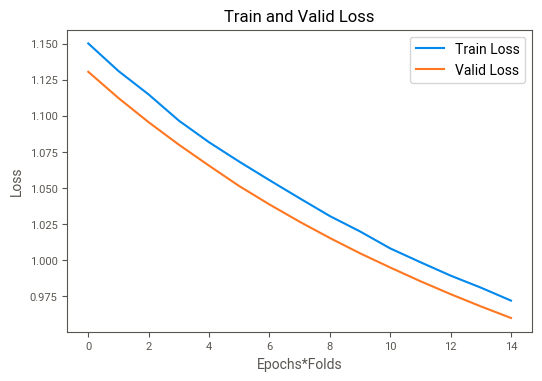

{'Adam/0.001/128/256/128/relu/relu/relu/without_dropout': [0.6868332602659653],
 'Adam/0.001/128/256/128/relu/relu/relu': [0.6910711676165424],
 'Adam/0.0001/128/256/128/relu/relu/relu': [0.6882946076282332],
 'SGD/0.001/128/256/128/relu/relu/relu': [0.6028057869355545],
 'SGD/0.0001/128/256/128/relu/relu/relu': [0.6028057869355545]}

In [30]:
# Define model architecture
model = keras.Sequential([
    # Input Layer
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_dummy.shape[1],)),
    
    # Hidden Layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    
    # Output Layer
    keras.layers.Dense(y_train_ohe.shape[1], activation='softmax')
])

# Define early stopping parameters
early_stopping_patience = 5 # Stop training if no improvement after 5 epochs
early_stopping_min_delta = 0.01 # Stop training if improvement is less than 0.01%
# Create EarlyStopping callback object
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, min_delta=early_stopping_min_delta)
# Define where to save the best model based on validation accuracy
best_model_path = 'best_model.h4'
# Create ModelCheckpoint callback object
model_checkpoint = ModelCheckpoint(best_model_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
                                  
# Compile model with categorical crossentropy loss and Adam optimizer with learning rate 0.001
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.0001), metrics=['accuracy'])

# Train model with mini-batch and stratified kfold validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scores = []
m1=losses = {'train': [], 'valid': []}  # Initialize dictionary to store losses

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_dummy, y_train_ohe.argmax(1))):
    
    # Split data into training and validation sets for this fold
    X_fold_train, X_fold_val = X_train_dummy.iloc[train_idx], X_train_dummy.iloc[val_idx]
    y_fold_train, y_fold_val = y_train_ohe[train_idx], y_train_ohe[val_idx]
    
    # Train model on this fold's training set
    
    history = model.fit(X_fold_train, y_fold_train, epochs=5, batch_size=64, validation_data=(X_fold_val, y_fold_val),
                    callbacks=[early_stopping, model_checkpoint])

    # Evaluate model on this fold's validation set
    score = model.evaluate(X_fold_val, y_fold_val)[1]
    scores.append(score)
    
    # Print current fold's validation accuracy
    print(f"Validation accuracy (fold {fold+1}): {score:.3f}")

    # Append train and validation losses for this fold to the losses dictionary
    losses['train'].extend(history.history['loss'])
    losses['valid'].extend(history.history['val_loss'])
    
    # Print current fold's train and validation losses
    print(f"Train loss (fold {fold+1}): {np.mean(losses['train'][-len(history.history['loss']):]):.3f}")
    print(f"Validation loss (fold {fold+1}): {np.mean(losses['valid'][-len(history.history['val_loss']):]):.3f}")

# Calculate mean and standard deviation of validation accuracies across all folds
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"Mean validation accuracy: {mean_score:.3f}")
print(f"Standard deviation of validation accuracies: {std_score:.3f}")
# Load the saved best model
best_model = load_model(best_model_path)
# Evaluate final model on test set
test_pred = best_model.predict(X_test_dummy)
test_accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), np.argmax(test_pred, axis=1))
print(f"Test set accuracy score: {test_accuracy:.3f}")
# Plot train and test losses against epochs
fig, ax = plt.subplots()
ax.plot(losses['train'], label='Train Loss')
ax.plot(losses['valid'], label='Valid Loss')
ax.set_xlabel('Epochs*Folds')
ax.set_ylabel('Loss')
ax.set_title('Train and Valid Loss')
ax.legend()
plt.show()


m4_losses=losses

dict["SGD/0.0001/128/256/128/relu/relu/relu"]=[test_accuracy]
dict


Epoch 1/5
277/286 [============================>.] - ETA: 0s - loss: 0.7176 - accuracy: 0.6631
Epoch 1: val_accuracy improved from -inf to 0.69027, saving model to best_model.h5
286/286 [==============================] - 2s 5ms/step - loss: 0.7172 - accuracy: 0.6633 - val_loss: 0.6661 - val_accuracy: 0.6903
Epoch 2/5
284/286 [============================>.] - ETA: 0s - loss: 0.6691 - accuracy: 0.6814
Epoch 2: val_accuracy improved from 0.69027 to 0.69312, saving model to best_model.h5
286/286 [==============================] - 1s 4ms/step - loss: 0.6691 - accuracy: 0.6812 - val_loss: 0.6660 - val_accuracy: 0.6931
Epoch 3/5
280/286 [============================>.] - ETA: 0s - loss: 0.6556 - accuracy: 0.6882
Epoch 3: val_accuracy improved from 0.69312 to 0.69695, saving model to best_model.h5
286/286 [==============================] - 1s 5ms/step - loss: 0.6562 - accuracy: 0.6877 - val_loss: 0.6521 - val_accuracy: 0.6970
Epoch 4/5
285/286 [============================>.] - ETA: 0s - loss

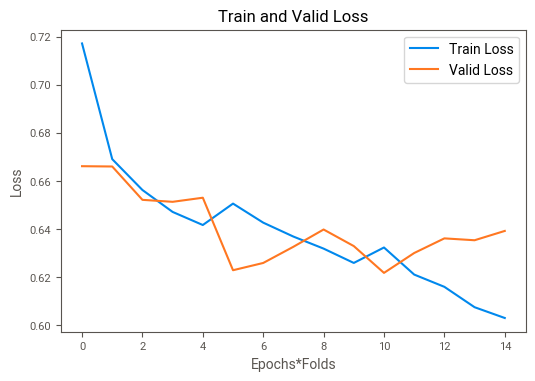

{'Adam/0.001/128/256/128/relu/relu/relu/without_dropout': [0.6868332602659653],
 'Adam/0.001/128/256/128/relu/relu/relu': [0.6910711676165424],
 'Adam/0.0001/128/256/128/relu/relu/relu': [0.6882946076282332],
 'SGD/0.001/128/256/128/relu/relu/relu': [0.6028057869355545],
 'SGD/0.0001/128/256/128/relu/relu/relu': [0.6028057869355545],
 'Adam/0.001/256/512/256/relu/relu/relu': [0.6913634370889961]}

In [31]:
# Define model architecture
model = keras.Sequential([
    # Input Layer
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_dummy.shape[1],)),
    
    # Hidden Layers
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),
    
    # Output Layer
    keras.layers.Dense(y_train_ohe.shape[1], activation='softmax')
])

# Define early stopping parameters
early_stopping_patience = 5 # Stop training if no improvement after 5 epochs
early_stopping_min_delta = 0.01 # Stop training if improvement is less than 0.01%
# Create EarlyStopping callback object
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, min_delta=early_stopping_min_delta)
# Define where to save the best model based on validation accuracy
best_model_path = 'best_model.h5'
# Create ModelCheckpoint callback object
model_checkpoint = ModelCheckpoint(best_model_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
                                  
# Compile model with categorical crossentropy loss and Adam optimizer with learning rate 0.001
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model with mini-batch and stratified kfold validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scores = []
losses = {'train': [], 'valid': []}  # Initialize dictionary to store losses

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_dummy, y_train_ohe.argmax(1))):
    
    # Split data into training and validation sets for this fold
    X_fold_train, X_fold_val = X_train_dummy.iloc[train_idx], X_train_dummy.iloc[val_idx]
    y_fold_train, y_fold_val = y_train_ohe[train_idx], y_train_ohe[val_idx]
    
    # Train model on this fold's training set
    
    history = model.fit(X_fold_train, y_fold_train, epochs=5, batch_size=64, validation_data=(X_fold_val, y_fold_val),
                    callbacks=[early_stopping, model_checkpoint])

    # Evaluate model on this fold's validation set
    score = model.evaluate(X_fold_val, y_fold_val)[1]
    scores.append(score)
    
    # Print current fold's validation accuracy
    print(f"Validation accuracy (fold {fold+1}): {score:.3f}")

    # Append train and validation losses for this fold to the losses dictionary
    losses['train'].extend(history.history['loss'])
    losses['valid'].extend(history.history['val_loss'])
    
    # Print current fold's train and validation losses
    print(f"Train loss (fold {fold+1}): {np.mean(losses['train'][-len(history.history['loss']):]):.3f}")
    print(f"Validation loss (fold {fold+1}): {np.mean(losses['valid'][-len(history.history['val_loss']):]):.3f}")

# Calculate mean and standard deviation of validation accuracies across all folds
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"Mean validation accuracy: {mean_score:.3f}")
print(f"Standard deviation of validation accuracies: {std_score:.3f}")
# Load the saved best model
best_model = load_model(best_model_path)
# Evaluate final model on test set
test_pred = best_model.predict(X_test_dummy)
test_accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), np.argmax(test_pred, axis=1))
print(f"Test set accuracy score: {test_accuracy:.3f}")
# Plot train and test losses against epochs
fig, ax = plt.subplots()
ax.plot(losses['train'], label='Train Loss')
ax.plot(losses['valid'], label='Valid Loss')
ax.set_xlabel('Epochs*Folds')
ax.set_ylabel('Loss')
ax.set_title('Train and Valid Loss')
ax.legend()
plt.show()


m5_losses=losses

dict["Adam/0.001/256/512/256/relu/relu/relu"]=[test_accuracy]
dict


Epoch 1/5
273/286 [===========================>..] - ETA: 0s - loss: 0.7196 - accuracy: 0.6615
Epoch 1: val_accuracy improved from -inf to 0.68895, saving model to best_model.h6


INFO:tensorflow:Assets written to: best_model.h6/assets


INFO:tensorflow:Assets written to: best_model.h6/assets


286/286 [==============================] - 4s 9ms/step - loss: 0.7175 - accuracy: 0.6626 - val_loss: 0.6760 - val_accuracy: 0.6890
Epoch 2/5
286/286 [==============================] - ETA: 0s - loss: 0.6665 - accuracy: 0.6837
Epoch 2: val_accuracy did not improve from 0.68895
286/286 [==============================] - 1s 5ms/step - loss: 0.6665 - accuracy: 0.6837 - val_loss: 0.6681 - val_accuracy: 0.6872
Epoch 3/5
276/286 [===========================>..] - ETA: 0s - loss: 0.6560 - accuracy: 0.6883
Epoch 3: val_accuracy did not improve from 0.68895
286/286 [==============================] - 2s 6ms/step - loss: 0.6564 - accuracy: 0.6879 - val_loss: 0.6581 - val_accuracy: 0.6879
Epoch 4/5
275/286 [===========================>..] - ETA: 0s - loss: 0.6473 - accuracy: 0.6910
Epoch 4: val_accuracy improved from 0.68895 to 0.69334, saving model to best_model.h6


INFO:tensorflow:Assets written to: best_model.h6/assets


INFO:tensorflow:Assets written to: best_model.h6/assets


286/286 [==============================] - 3s 11ms/step - loss: 0.6489 - accuracy: 0.6905 - val_loss: 0.6653 - val_accuracy: 0.6933
Epoch 5/5
273/286 [===========================>..] - ETA: 0s - loss: 0.6429 - accuracy: 0.6953
Epoch 5: val_accuracy did not improve from 0.69334
286/286 [==============================] - 0s 1ms/step - loss: 0.6588 - accuracy: 0.6919
Validation accuracy (fold 1): 0.692
Train loss (fold 1): 0.666
Validation loss (fold 1): 0.665
Epoch 1/5
278/286 [============================>.] - ETA: 0s - loss: 0.6532 - accuracy: 0.6897
Epoch 1: val_accuracy improved from 0.69334 to 0.70196, saving model to best_model.h6


INFO:tensorflow:Assets written to: best_model.h6/assets


INFO:tensorflow:Assets written to: best_model.h6/assets


286/286 [==============================] - 2s 8ms/step - loss: 0.6528 - accuracy: 0.6899 - val_loss: 0.6252 - val_accuracy: 0.7020
Epoch 2/5
273/286 [===========================>..] - ETA: 0s - loss: 0.6451 - accuracy: 0.6929
Epoch 2: val_accuracy improved from 0.70196 to 0.70635, saving model to best_model.h6


INFO:tensorflow:Assets written to: best_model.h6/assets


INFO:tensorflow:Assets written to: best_model.h6/assets


286/286 [==============================] - 2s 7ms/step - loss: 0.6450 - accuracy: 0.6930 - val_loss: 0.6275 - val_accuracy: 0.7063
Epoch 3/5
277/286 [============================>.] - ETA: 0s - loss: 0.6372 - accuracy: 0.6980
Epoch 3: val_accuracy did not improve from 0.70635
286/286 [==============================] - 1s 4ms/step - loss: 0.6382 - accuracy: 0.6967 - val_loss: 0.6306 - val_accuracy: 0.6970
Epoch 4/5
283/286 [============================>.] - ETA: 0s - loss: 0.6345 - accuracy: 0.6956
Epoch 4: val_accuracy did not improve from 0.70635
286/286 [==============================] - 1s 4ms/step - loss: 0.6348 - accuracy: 0.6953 - val_loss: 0.6333 - val_accuracy: 0.7017
Epoch 5/5
275/286 [===========================>..] - ETA: 0s - loss: 0.6289 - accuracy: 0.6978
Epoch 5: val_accuracy did not improve from 0.70635
286/286 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.6976
Validation accuracy (fold 2): 0.698
Train loss (fold 2): 0.640
Validation loss (

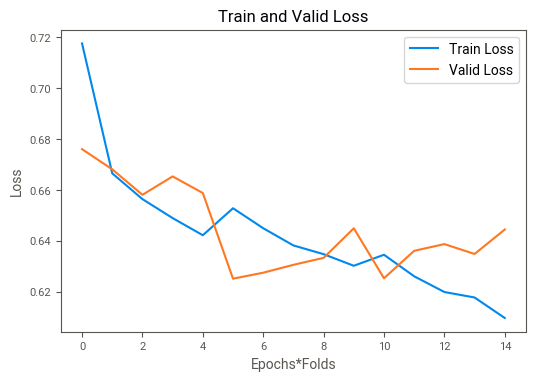

{'Adam/0.001/128/256/128/relu/relu/relu/without_dropout': [0.6868332602659653],
 'Adam/0.001/128/256/128/relu/relu/relu': [0.6910711676165424],
 'Adam/0.0001/128/256/128/relu/relu/relu': [0.6882946076282332],
 'SGD/0.001/128/256/128/relu/relu/relu': [0.6028057869355545],
 'SGD/0.0001/128/256/128/relu/relu/relu': [0.6028057869355545],
 'Adam/0.001/256/512/256/relu/relu/relu': [0.6913634370889961],
 'Adam/0.001/256/512/256/leaky_relu/leaky_relu/leaky_relu': [0.6861025865848313]}

In [32]:
# Define model architecture
model = keras.Sequential([
    # Input Layer
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_dummy.shape[1],)),
    
    # Hidden Layers
    keras.layers.Dense(256, activation='leaky_relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(512, activation='leaky_relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(256, activation='leaky_relu'),
    keras.layers.Dropout(0.25),
    
    # Output Layer
    keras.layers.Dense(y_train_ohe.shape[1], activation='softmax')
])

# Define early stopping parameters
early_stopping_patience = 5 # Stop training if no improvement after 5 epochs
early_stopping_min_delta = 0.01 # Stop training if improvement is less than 0.01%
# Create EarlyStopping callback object
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, min_delta=early_stopping_min_delta)
# Define where to save the best model based on validation accuracy
best_model_path = 'best_model.h6'
# Create ModelCheckpoint callback object
model_checkpoint = ModelCheckpoint(best_model_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
                                  
# Compile model with categorical crossentropy loss and Adam optimizer with learning rate 0.001
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model with mini-batch and stratified kfold validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scores = []
losses = {'train': [], 'valid': []}  # Initialize dictionary to store losses

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_dummy, y_train_ohe.argmax(1))):
    
    # Split data into training and validation sets for this fold
    X_fold_train, X_fold_val = X_train_dummy.iloc[train_idx], X_train_dummy.iloc[val_idx]
    y_fold_train, y_fold_val = y_train_ohe[train_idx], y_train_ohe[val_idx]
    
    # Train model on this fold's training set
    
    history = model.fit(X_fold_train, y_fold_train, epochs=5, batch_size=64, validation_data=(X_fold_val, y_fold_val),
                    callbacks=[early_stopping, model_checkpoint])

    # Evaluate model on this fold's validation set
    score = model.evaluate(X_fold_val, y_fold_val)[1]
    scores.append(score)
    
    # Print current fold's validation accuracy
    print(f"Validation accuracy (fold {fold+1}): {score:.3f}")

    # Append train and validation losses for this fold to the losses dictionary
    losses['train'].extend(history.history['loss'])
    losses['valid'].extend(history.history['val_loss'])
    
    # Print current fold's train and validation losses
    print(f"Train loss (fold {fold+1}): {np.mean(losses['train'][-len(history.history['loss']):]):.3f}")
    print(f"Validation loss (fold {fold+1}): {np.mean(losses['valid'][-len(history.history['val_loss']):]):.3f}")

# Calculate mean and standard deviation of validation accuracies across all folds
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"Mean validation accuracy: {mean_score:.3f}")
print(f"Standard deviation of validation accuracies: {std_score:.3f}")
# Load the saved best model
best_model = load_model(best_model_path)
# Evaluate final model on test set
test_pred = best_model.predict(X_test_dummy)
test_accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), np.argmax(test_pred, axis=1))
print(f"Test set accuracy score: {test_accuracy:.3f}")
# Plot train and test losses against epochs
fig, ax = plt.subplots()
ax.plot(losses['train'], label='Train Loss')
ax.plot(losses['valid'], label='Valid Loss')
ax.set_xlabel('Epochs*Folds')
ax.set_ylabel('Loss')
ax.set_title('Train and Valid Loss')
ax.legend()
plt.show()

m6_losses=losses

dict["Adam/0.001/256/512/256/leaky_relu/leaky_relu/leaky_relu"]=[test_accuracy]
dict


Epoch 1/5
282/286 [============================>.] - ETA: 0s - loss: 0.7326 - accuracy: 0.6570
Epoch 1: val_accuracy improved from -inf to 0.68709, saving model to best_model.h7


INFO:tensorflow:Assets written to: best_model.h7/assets


INFO:tensorflow:Assets written to: best_model.h7/assets


286/286 [==============================] - 3s 8ms/step - loss: 0.7322 - accuracy: 0.6570 - val_loss: 0.6690 - val_accuracy: 0.6871
Epoch 2/5
273/286 [===========================>..] - ETA: 0s - loss: 0.6847 - accuracy: 0.6737
Epoch 2: val_accuracy improved from 0.68709 to 0.68928, saving model to best_model.h7


INFO:tensorflow:Assets written to: best_model.h7/assets


INFO:tensorflow:Assets written to: best_model.h7/assets


286/286 [==============================] - 2s 7ms/step - loss: 0.6837 - accuracy: 0.6742 - val_loss: 0.6662 - val_accuracy: 0.6893
Epoch 3/5
282/286 [============================>.] - ETA: 0s - loss: 0.6680 - accuracy: 0.6807
Epoch 3: val_accuracy improved from 0.68928 to 0.69367, saving model to best_model.h7


INFO:tensorflow:Assets written to: best_model.h7/assets


INFO:tensorflow:Assets written to: best_model.h7/assets


286/286 [==============================] - 2s 7ms/step - loss: 0.6682 - accuracy: 0.6806 - val_loss: 0.6642 - val_accuracy: 0.6937
Epoch 4/5
275/286 [===========================>..] - ETA: 0s - loss: 0.6610 - accuracy: 0.6876
Epoch 4: val_accuracy did not improve from 0.69367
286/286 [==============================] - 1s 4ms/step - loss: 0.6610 - accuracy: 0.6888 - val_loss: 0.6639 - val_accuracy: 0.6934
Epoch 5/5
286/286 [==============================] - ETA: 0s - loss: 0.6542 - accuracy: 0.6911
Epoch 5: val_accuracy improved from 0.69367 to 0.69443, saving model to best_model.h7


INFO:tensorflow:Assets written to: best_model.h7/assets


INFO:tensorflow:Assets written to: best_model.h7/assets


286/286 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.6944
Validation accuracy (fold 1): 0.694
Train loss (fold 1): 0.680
Validation loss (fold 1): 0.667
Epoch 1/5
273/286 [===========================>..] - ETA: 0s - loss: 0.6622 - accuracy: 0.6877
Epoch 1: val_accuracy improved from 0.69443 to 0.70569, saving model to best_model.h7


INFO:tensorflow:Assets written to: best_model.h7/assets


INFO:tensorflow:Assets written to: best_model.h7/assets


286/286 [==============================] - 2s 8ms/step - loss: 0.6622 - accuracy: 0.6871 - val_loss: 0.6379 - val_accuracy: 0.7057
Epoch 2/5
277/286 [============================>.] - ETA: 0s - loss: 0.6579 - accuracy: 0.6886
Epoch 2: val_accuracy did not improve from 0.70569
286/286 [==============================] - 1s 5ms/step - loss: 0.6571 - accuracy: 0.6890 - val_loss: 0.6377 - val_accuracy: 0.7001
Epoch 3/5
281/286 [============================>.] - ETA: 0s - loss: 0.6469 - accuracy: 0.6941
Epoch 3: val_accuracy did not improve from 0.70569
286/286 [==============================] - 1s 5ms/step - loss: 0.6481 - accuracy: 0.6935 - val_loss: 0.6417 - val_accuracy: 0.6977
Epoch 4/5
277/286 [============================>.] - ETA: 0s - loss: 0.6447 - accuracy: 0.6978
Epoch 4: val_accuracy did not improve from 0.70569
286/286 [==============================] - 1s 5ms/step - loss: 0.6455 - accuracy: 0.6970 - val_loss: 0.6431 - val_accuracy: 0.6955
Epoch 5/5
282/286 [===================

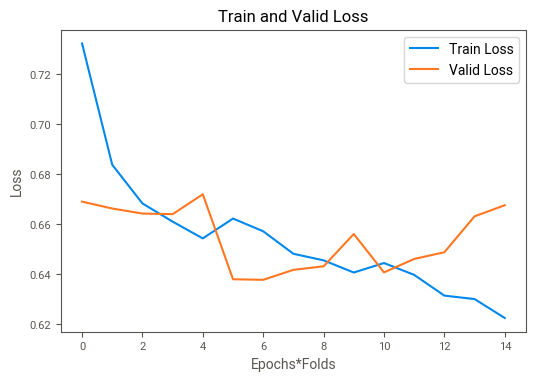

{'Adam/0.001/128/256/128/relu/relu/relu/without_dropout': [0.6868332602659653],
 'Adam/0.001/128/256/128/relu/relu/relu': [0.6910711676165424],
 'Adam/0.0001/128/256/128/relu/relu/relu': [0.6882946076282332],
 'SGD/0.001/128/256/128/relu/relu/relu': [0.6028057869355545],
 'SGD/0.0001/128/256/128/relu/relu/relu': [0.6028057869355545],
 'Adam/0.001/256/512/256/relu/relu/relu': [0.6913634370889961],
 'Adam/0.001/256/512/256/leaky_relu/leaky_relu/leaky_relu': [0.6861025865848313],
 'Adam/0.001/256/512/256/tanh/tanh/tanh': [0.6884407423644601]}

In [33]:
# Define model architecture
model = keras.Sequential([
    # Input Layer
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_dummy.shape[1],)),
    
    # Hidden Layers
    keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(512, activation='tanh'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dropout(0.25),
    
    # Output Layer
    keras.layers.Dense(y_train_ohe.shape[1], activation='softmax')
])

# Define early stopping parameters
early_stopping_patience = 5 # Stop training if no improvement after 5 epochs
early_stopping_min_delta = 0.01 # Stop training if improvement is less than 0.01%
# Create EarlyStopping callback object
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, min_delta=early_stopping_min_delta)
# Define where to save the best model based on validation accuracy
best_model_path = 'best_model.h7'
# Create ModelCheckpoint callback object
model_checkpoint = ModelCheckpoint(best_model_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
                                  
# Compile model with categorical crossentropy loss and Adam optimizer with learning rate 0.001
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model with mini-batch and stratified kfold validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scores = []
losses = {'train': [], 'valid': []}  # Initialize dictionary to store losses

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_dummy, y_train_ohe.argmax(1))):
    
    # Split data into training and validation sets for this fold
    X_fold_train, X_fold_val = X_train_dummy.iloc[train_idx], X_train_dummy.iloc[val_idx]
    y_fold_train, y_fold_val = y_train_ohe[train_idx], y_train_ohe[val_idx]
    
    # Train model on this fold's training set
    
    history = model.fit(X_fold_train, y_fold_train, epochs=5, batch_size=64, validation_data=(X_fold_val, y_fold_val),
                    callbacks=[early_stopping, model_checkpoint])

    # Evaluate model on this fold's validation set
    score = model.evaluate(X_fold_val, y_fold_val)[1]
    scores.append(score)
    
    # Print current fold's validation accuracy
    print(f"Validation accuracy (fold {fold+1}): {score:.3f}")

    # Append train and validation losses for this fold to the losses dictionary
    losses['train'].extend(history.history['loss'])
    losses['valid'].extend(history.history['val_loss'])
    
    # Print current fold's train and validation losses
    print(f"Train loss (fold {fold+1}): {np.mean(losses['train'][-len(history.history['loss']):]):.3f}")
    print(f"Validation loss (fold {fold+1}): {np.mean(losses['valid'][-len(history.history['val_loss']):]):.3f}")

# Calculate mean and standard deviation of validation accuracies across all folds
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"Mean validation accuracy: {mean_score:.3f}")
print(f"Standard deviation of validation accuracies: {std_score:.3f}")
# Load the saved best model
best_model = load_model(best_model_path)
# Evaluate final model on test set
test_pred = best_model.predict(X_test_dummy)
test_accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), np.argmax(test_pred, axis=1))
print(f"Test set accuracy score: {test_accuracy:.3f}")
# Plot train and test losses against epochs
fig, ax = plt.subplots()
ax.plot(losses['train'], label='Train Loss')
ax.plot(losses['valid'], label='Valid Loss')
ax.set_xlabel('Epochs*Folds')
ax.set_ylabel('Loss')
ax.set_title('Train and Valid Loss')
ax.legend()
plt.show()

m7_losses=losses

dict["Adam/0.001/256/512/256/tanh/tanh/tanh"]=[test_accuracy]
dict


Epoch 1/30
1527/1540 [============================>.] - ETA: 0s - loss: 0.6920 - accuracy: 0.6748
Epoch 1: val_accuracy improved from -inf to 0.68688, saving model to best_model.Final2


INFO:tensorflow:Assets written to: best_model.Final2/assets


INFO:tensorflow:Assets written to: best_model.Final2/assets


1540/1540 [==============================] - 7s 4ms/step - loss: 0.6922 - accuracy: 0.6747 - val_loss: 0.6612 - val_accuracy: 0.6869
Epoch 2/30
1535/1540 [============================>.] - ETA: 0s - loss: 0.6594 - accuracy: 0.6906
Epoch 2: val_accuracy improved from 0.68688 to 0.69236, saving model to best_model.Final2


INFO:tensorflow:Assets written to: best_model.Final2/assets


INFO:tensorflow:Assets written to: best_model.Final2/assets


1540/1540 [==============================] - 6s 4ms/step - loss: 0.6595 - accuracy: 0.6906 - val_loss: 0.6617 - val_accuracy: 0.6924
Epoch 3/30
1534/1540 [============================>.] - ETA: 0s - loss: 0.6532 - accuracy: 0.6910
Epoch 3: val_accuracy did not improve from 0.69236
1540/1540 [==============================] - 5s 3ms/step - loss: 0.6531 - accuracy: 0.6908 - val_loss: 0.6520 - val_accuracy: 0.6774
Epoch 4/30
1532/1540 [============================>.] - ETA: 0s - loss: 0.6489 - accuracy: 0.6931
Epoch 4: val_accuracy did not improve from 0.69236
1540/1540 [==============================] - 4s 3ms/step - loss: 0.6488 - accuracy: 0.6930 - val_loss: 0.6529 - val_accuracy: 0.6883
Epoch 5/30
1534/1540 [============================>.] - ETA: 0s - loss: 0.6416 - accuracy: 0.6962
Epoch 5: val_accuracy did not improve from 0.69236
1540/1540 [==============================] - 4s 3ms/step - loss: 0.6416 - accuracy: 0.6961 - val_loss: 0.6571 - val_accuracy: 0.6858
Epoch 6/30
1528/1540 

INFO:tensorflow:Assets written to: best_model.Final2/assets


INFO:tensorflow:Assets written to: best_model.Final2/assets


1540/1540 [==============================] - 5s 4ms/step - loss: 0.6243 - accuracy: 0.7009 - val_loss: 0.6665 - val_accuracy: 0.6949
Epoch 10/30
1538/1540 [============================>.] - ETA: 0s - loss: 0.6215 - accuracy: 0.7016
Epoch 10: val_accuracy did not improve from 0.69492
1540/1540 [==============================] - 5s 3ms/step - loss: 0.6213 - accuracy: 0.7017 - val_loss: 0.6703 - val_accuracy: 0.6821
Epoch 11/30
1529/1540 [============================>.] - ETA: 0s - loss: 0.6157 - accuracy: 0.7049
Epoch 11: val_accuracy did not improve from 0.69492
86/86 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.6814
Validation accuracy (fold 1): 0.681
Train loss (fold 1): 0.642
Validation loss (fold 1): 0.663
Epoch 1/30
1532/1540 [============================>.] - ETA: 0s - loss: 0.6213 - accuracy: 0.7051
Epoch 1: val_accuracy improved from 0.69492 to 0.71209, saving model to best_model.Final2


INFO:tensorflow:Assets written to: best_model.Final2/assets


INFO:tensorflow:Assets written to: best_model.Final2/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.6214 - accuracy: 0.7050 - val_loss: 0.6011 - val_accuracy: 0.7121
Epoch 2/30
1527/1540 [============================>.] - ETA: 0s - loss: 0.6163 - accuracy: 0.7046
Epoch 2: val_accuracy did not improve from 0.71209
1540/1540 [==============================] - 4s 3ms/step - loss: 0.6155 - accuracy: 0.7052 - val_loss: 0.6148 - val_accuracy: 0.7070
Epoch 3/30
1537/1540 [============================>.] - ETA: 0s - loss: 0.6102 - accuracy: 0.7035
Epoch 3: val_accuracy did not improve from 0.71209
1540/1540 [==============================] - 4s 3ms/step - loss: 0.6099 - accuracy: 0.7036 - val_loss: 0.6204 - val_accuracy: 0.7022
Epoch 4/30
1537/1540 [============================>.] - ETA: 0s - loss: 0.6053 - accuracy: 0.7083
Epoch 4: val_accuracy did not improve from 0.71209
1540/1540 [==============================] - 4s 3ms/step - loss: 0.6056 - accuracy: 0.7082 - val_loss: 0.6331 - val_accuracy: 0.6967
Epoch 5/30
1539/1540 

INFO:tensorflow:Assets written to: best_model.Final2/assets


INFO:tensorflow:Assets written to: best_model.Final2/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.5853 - accuracy: 0.7176 - val_loss: 0.5573 - val_accuracy: 0.7395
Epoch 2/30
1523/1540 [============================>.] - ETA: 0s - loss: 0.5746 - accuracy: 0.7191
Epoch 2: val_accuracy did not improve from 0.73950
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5751 - accuracy: 0.7187 - val_loss: 0.5668 - val_accuracy: 0.7289
Epoch 3/30
1523/1540 [============================>.] - ETA: 0s - loss: 0.5702 - accuracy: 0.7202
Epoch 3: val_accuracy did not improve from 0.73950
1540/1540 [==============================] - 5s 3ms/step - loss: 0.5701 - accuracy: 0.7203 - val_loss: 0.5782 - val_accuracy: 0.7267
Epoch 4/30
1531/1540 [============================>.] - ETA: 0s - loss: 0.5640 - accuracy: 0.7261
Epoch 4: val_accuracy did not improve from 0.73950
1540/1540 [==============================] - 5s 3ms/step - loss: 0.5638 - accuracy: 0.7262 - val_loss: 0.5763 - val_accuracy: 0.7271
Epoch 5/30
1529/1540 

INFO:tensorflow:Assets written to: best_model.Final2/assets


INFO:tensorflow:Assets written to: best_model.Final2/assets


1540/1540 [==============================] - 5s 4ms/step - loss: 0.5475 - accuracy: 0.7377 - val_loss: 0.5227 - val_accuracy: 0.7475
Epoch 2/30
1533/1540 [============================>.] - ETA: 0s - loss: 0.5383 - accuracy: 0.7419
Epoch 2: val_accuracy did not improve from 0.74753
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5382 - accuracy: 0.7417 - val_loss: 0.5439 - val_accuracy: 0.7369
Epoch 3/30
1526/1540 [============================>.] - ETA: 0s - loss: 0.5373 - accuracy: 0.7378
Epoch 3: val_accuracy did not improve from 0.74753
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5372 - accuracy: 0.7378 - val_loss: 0.5556 - val_accuracy: 0.7296
Epoch 4/30
1535/1540 [============================>.] - ETA: 0s - loss: 0.5343 - accuracy: 0.7409
Epoch 4: val_accuracy did not improve from 0.74753
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5343 - accuracy: 0.7410 - val_loss: 0.5612 - val_accuracy: 0.7256
Epoch 5/30
1522/1540 

INFO:tensorflow:Assets written to: best_model.Final2/assets


INFO:tensorflow:Assets written to: best_model.Final2/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.5310 - accuracy: 0.7455 - val_loss: 0.4815 - val_accuracy: 0.7782
Epoch 2/30
1528/1540 [============================>.] - ETA: 0s - loss: 0.5120 - accuracy: 0.7510
Epoch 2: val_accuracy did not improve from 0.77822
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5123 - accuracy: 0.7510 - val_loss: 0.4832 - val_accuracy: 0.7698
Epoch 3/30
1534/1540 [============================>.] - ETA: 0s - loss: 0.5145 - accuracy: 0.7515
Epoch 3: val_accuracy did not improve from 0.77822
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5144 - accuracy: 0.7516 - val_loss: 0.5052 - val_accuracy: 0.7556
Epoch 4/30
1539/1540 [============================>.] - ETA: 0s - loss: 0.5095 - accuracy: 0.7549
Epoch 4: val_accuracy did not improve from 0.77822
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5095 - accuracy: 0.7549 - val_loss: 0.5143 - val_accuracy: 0.7621
Epoch 5/30
1540/1540 

INFO:tensorflow:Assets written to: best_model.Final2/assets


INFO:tensorflow:Assets written to: best_model.Final2/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.4968 - accuracy: 0.7605 - val_loss: 0.4539 - val_accuracy: 0.7786
Epoch 2/30
1528/1540 [============================>.] - ETA: 0s - loss: 0.4920 - accuracy: 0.7659
Epoch 2: val_accuracy did not improve from 0.77859
1540/1540 [==============================] - 4s 3ms/step - loss: 0.4920 - accuracy: 0.7660 - val_loss: 0.4714 - val_accuracy: 0.7651
Epoch 3/30
1539/1540 [============================>.] - ETA: 0s - loss: 0.4872 - accuracy: 0.7647
Epoch 3: val_accuracy did not improve from 0.77859
1540/1540 [==============================] - 4s 3ms/step - loss: 0.4872 - accuracy: 0.7646 - val_loss: 0.4856 - val_accuracy: 0.7611
Epoch 4/30
1527/1540 [============================>.] - ETA: 0s - loss: 0.4851 - accuracy: 0.7685
Epoch 4: val_accuracy did not improve from 0.77859
1540/1540 [==============================] - 4s 3ms/step - loss: 0.4849 - accuracy: 0.7690 - val_loss: 0.4907 - val_accuracy: 0.7534
Epoch 5/30
1523/1540 

INFO:tensorflow:Assets written to: best_model.Final2/assets


INFO:tensorflow:Assets written to: best_model.Final2/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.4826 - accuracy: 0.7686 - val_loss: 0.4348 - val_accuracy: 0.7987
Epoch 2/30
1539/1540 [============================>.] - ETA: 0s - loss: 0.4729 - accuracy: 0.7734
Epoch 2: val_accuracy did not improve from 0.79868
1540/1540 [==============================] - 4s 3ms/step - loss: 0.4732 - accuracy: 0.7732 - val_loss: 0.4400 - val_accuracy: 0.7874
Epoch 3/30
1531/1540 [============================>.] - ETA: 0s - loss: 0.4782 - accuracy: 0.7720
Epoch 3: val_accuracy did not improve from 0.79868
1540/1540 [==============================] - 4s 3ms/step - loss: 0.4778 - accuracy: 0.7724 - val_loss: 0.4513 - val_accuracy: 0.7815
Epoch 4/30
1522/1540 [============================>.] - ETA: 0s - loss: 0.4691 - accuracy: 0.7751
Epoch 4: val_accuracy did not improve from 0.79868
1540/1540 [==============================] - 4s 2ms/step - loss: 0.4701 - accuracy: 0.7747 - val_loss: 0.4593 - val_accuracy: 0.7753
Epoch 5/30
1533/1540 

INFO:tensorflow:Assets written to: best_model.Final2/assets


INFO:tensorflow:Assets written to: best_model.Final2/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.4594 - accuracy: 0.7818 - val_loss: 0.4007 - val_accuracy: 0.8188
Epoch 2/30
1539/1540 [============================>.] - ETA: 0s - loss: 0.4544 - accuracy: 0.7832
Epoch 2: val_accuracy did not improve from 0.81878
1540/1540 [==============================] - 4s 3ms/step - loss: 0.4544 - accuracy: 0.7832 - val_loss: 0.4091 - val_accuracy: 0.8140
Epoch 3/30
1529/1540 [============================>.] - ETA: 0s - loss: 0.4399 - accuracy: 0.7916
Epoch 3: val_accuracy did not improve from 0.81878
1540/1540 [==============================] - 4s 3ms/step - loss: 0.4396 - accuracy: 0.7916 - val_loss: 0.4081 - val_accuracy: 0.8064
Epoch 4/30
1530/1540 [============================>.] - ETA: 0s - loss: 0.4441 - accuracy: 0.7889
Epoch 4: val_accuracy did not improve from 0.81878
1540/1540 [==============================] - 4s 3ms/step - loss: 0.4445 - accuracy: 0.7888 - val_loss: 0.4283 - val_accuracy: 0.8064
Epoch 5/30
1521/1540 

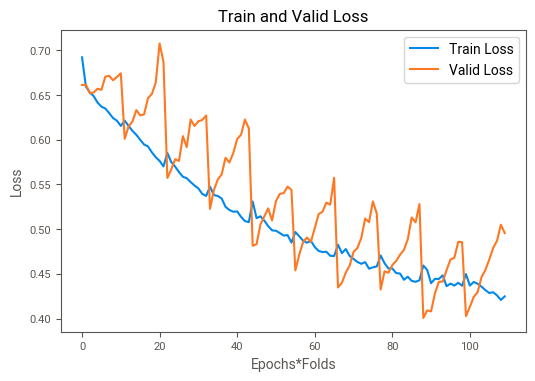

{'Adam/0.001/128/256/128/relu/relu/relu/without_dropout': [0.6868332602659653],
 'Adam/0.001/128/256/128/relu/relu/relu': [0.6910711676165424],
 'Adam/0.0001/128/256/128/relu/relu/relu': [0.6882946076282332],
 'SGD/0.001/128/256/128/relu/relu/relu': [0.6028057869355545],
 'SGD/0.0001/128/256/128/relu/relu/relu': [0.6028057869355545],
 'Adam/0.001/256/512/256/relu/relu/relu': [0.6913634370889961],
 'Adam/0.001/256/512/256/leaky_relu/leaky_relu/leaky_relu': [0.6861025865848313],
 'Adam/0.001/256/512/256/tanh/tanh/tanh': [0.6884407423644601],
 'Final1': [0.6567295046032442]}

In [35]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


# Define model architecture
model = keras.Sequential([
    # Input Layer
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_dummy.shape[1],)),
    
    # Hidden Layers
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),
    
    # Output Layer
    keras.layers.Dense(y_train_ohe.shape[1], activation='softmax')
])

# Define early stopping parameters
early_stopping_patience = 10 # Stop training if no improvement after 5 epochs
early_stopping_min_delta = 0.01 # Stop training if improvement is less than 0.01%
# Create EarlyStopping callback object
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, min_delta=early_stopping_min_delta)
# Define where to save the best model based on validation accuracy
best_model_path = 'best_model.Final2'
# Create ModelCheckpoint callback object
model_checkpoint = ModelCheckpoint(best_model_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
                                  
# Compile model with categorical crossentropy loss and Adam optimizer with learning rate 0.001
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model with mini-batch and stratified kfold validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []
losses = {'train': [], 'valid': []}  # Initialize dictionary to store losses

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_dummy, y_train_ohe.argmax(1))):
    
    # Split data into training and validation sets for this fold
    X_fold_train, X_fold_val = X_train_dummy.iloc[train_idx], X_train_dummy.iloc[val_idx]
    y_fold_train, y_fold_val = y_train_ohe[train_idx], y_train_ohe[val_idx]
    
    # Train model on this fold's training set
    
    history = model.fit(X_fold_train, y_fold_train, epochs=30, batch_size=16, validation_data=(X_fold_val, y_fold_val),
                    callbacks=[early_stopping, model_checkpoint])

    # Evaluate model on this fold's validation set
    score = model.evaluate(X_fold_val, y_fold_val)[1]
    scores.append(score)
    
    # Print current fold's validation accuracy
    print(f"Validation accuracy (fold {fold+1}): {score:.3f}")

    # Append train and validation losses for this fold to the losses dictionary
    losses['train'].extend(history.history['loss'])
    losses['valid'].extend(history.history['val_loss'])
    
    # Print current fold's train and validation losses
    print(f"Train loss (fold {fold+1}): {np.mean(losses['train'][-len(history.history['loss']):]):.3f}")
    print(f"Validation loss (fold {fold+1}): {np.mean(losses['valid'][-len(history.history['val_loss']):]):.3f}")

# Calculate mean and standard deviation of validation accuracies across all folds
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"Mean validation accuracy: {mean_score:.3f}")
print(f"Standard deviation of validation accuracies: {std_score:.3f}")
# Load the saved best model
best_model = load_model(best_model_path)
# Evaluate final model on test set
test_pred = best_model.predict(X_test_dummy)
test_accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), np.argmax(test_pred, axis=1))
print(f"Test set accuracy score: {test_accuracy:.3f}")
# Plot train and test losses against epochs
fig, ax = plt.subplots()
ax.plot(losses['train'], label='Train Loss')
ax.plot(losses['valid'], label='Valid Loss')
ax.set_xlabel('Epochs*Folds')
ax.set_ylabel('Loss')
ax.set_title('Train and Valid Loss')
ax.legend()
plt.show()

f2_losses=losses

dict["Final1"]=[test_accuracy]
dict

Epoch 1/30
1526/1540 [============================>.] - ETA: 0s - loss: 0.6966 - accuracy: 0.6768
Epoch 1: val_accuracy improved from -inf to 0.68615, saving model to best_model.Final3


INFO:tensorflow:Assets written to: best_model.Final3/assets


INFO:tensorflow:Assets written to: best_model.Final3/assets


1540/1540 [==============================] - 6s 3ms/step - loss: 0.6964 - accuracy: 0.6771 - val_loss: 0.6611 - val_accuracy: 0.6862
Epoch 2/30
1528/1540 [============================>.] - ETA: 0s - loss: 0.6593 - accuracy: 0.6907
Epoch 2: val_accuracy improved from 0.68615 to 0.68871, saving model to best_model.Final3


INFO:tensorflow:Assets written to: best_model.Final3/assets


INFO:tensorflow:Assets written to: best_model.Final3/assets


1540/1540 [==============================] - 6s 4ms/step - loss: 0.6593 - accuracy: 0.6904 - val_loss: 0.6587 - val_accuracy: 0.6887
Epoch 3/30
1527/1540 [============================>.] - ETA: 0s - loss: 0.6518 - accuracy: 0.6948
Epoch 3: val_accuracy improved from 0.68871 to 0.69492, saving model to best_model.Final3


INFO:tensorflow:Assets written to: best_model.Final3/assets


INFO:tensorflow:Assets written to: best_model.Final3/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.6522 - accuracy: 0.6944 - val_loss: 0.6572 - val_accuracy: 0.6949
Epoch 4/30
1520/1540 [============================>.] - ETA: 0s - loss: 0.6474 - accuracy: 0.6956
Epoch 4: val_accuracy did not improve from 0.69492
1540/1540 [==============================] - 4s 2ms/step - loss: 0.6485 - accuracy: 0.6952 - val_loss: 0.6509 - val_accuracy: 0.6920
Epoch 5/30
1536/1540 [============================>.] - ETA: 0s - loss: 0.6427 - accuracy: 0.6965
Epoch 5: val_accuracy did not improve from 0.69492
1540/1540 [==============================] - 4s 3ms/step - loss: 0.6427 - accuracy: 0.6965 - val_loss: 0.6529 - val_accuracy: 0.6935
Epoch 6/30
1532/1540 [============================>.] - ETA: 0s - loss: 0.6370 - accuracy: 0.6993
Epoch 6: val_accuracy did not improve from 0.69492
1540/1540 [==============================] - 4s 3ms/step - loss: 0.6372 - accuracy: 0.6991 - val_loss: 0.6513 - val_accuracy: 0.6913
Epoch 7/30
1526/1540 

INFO:tensorflow:Assets written to: best_model.Final3/assets


INFO:tensorflow:Assets written to: best_model.Final3/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.6249 - accuracy: 0.7024 - val_loss: 0.6199 - val_accuracy: 0.7070
Epoch 2/30
1529/1540 [============================>.] - ETA: 0s - loss: 0.6226 - accuracy: 0.7051
Epoch 2: val_accuracy did not improve from 0.70698
1540/1540 [==============================] - 4s 2ms/step - loss: 0.6219 - accuracy: 0.7056 - val_loss: 0.6173 - val_accuracy: 0.7033
Epoch 3/30
1531/1540 [============================>.] - ETA: 0s - loss: 0.6163 - accuracy: 0.7029
Epoch 3: val_accuracy did not improve from 0.70698
1540/1540 [==============================] - 4s 3ms/step - loss: 0.6164 - accuracy: 0.7028 - val_loss: 0.6327 - val_accuracy: 0.7062
Epoch 4/30
1525/1540 [============================>.] - ETA: 0s - loss: 0.6119 - accuracy: 0.7087
Epoch 4: val_accuracy did not improve from 0.70698
1540/1540 [==============================] - 4s 2ms/step - loss: 0.6126 - accuracy: 0.7084 - val_loss: 0.6327 - val_accuracy: 0.6942
Epoch 5/30
1526/1540 

INFO:tensorflow:Assets written to: best_model.Final3/assets


INFO:tensorflow:Assets written to: best_model.Final3/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.6048 - accuracy: 0.7103 - val_loss: 0.5794 - val_accuracy: 0.7278
Epoch 2/30
1526/1540 [============================>.] - ETA: 0s - loss: 0.5991 - accuracy: 0.7131
Epoch 2: val_accuracy did not improve from 0.72780
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5989 - accuracy: 0.7131 - val_loss: 0.5895 - val_accuracy: 0.7245
Epoch 3/30
1526/1540 [============================>.] - ETA: 0s - loss: 0.5950 - accuracy: 0.7130
Epoch 3: val_accuracy did not improve from 0.72780
1540/1540 [==============================] - 4s 2ms/step - loss: 0.5949 - accuracy: 0.7130 - val_loss: 0.5958 - val_accuracy: 0.7216
Epoch 4/30
1521/1540 [============================>.] - ETA: 0s - loss: 0.5867 - accuracy: 0.7163
Epoch 4: val_accuracy did not improve from 0.72780
1540/1540 [==============================] - 4s 2ms/step - loss: 0.5867 - accuracy: 0.7163 - val_loss: 0.6052 - val_accuracy: 0.7194
Epoch 5/30
1534/1540 

INFO:tensorflow:Assets written to: best_model.Final3/assets


INFO:tensorflow:Assets written to: best_model.Final3/assets


1540/1540 [==============================] - 4s 3ms/step - loss: 0.5819 - accuracy: 0.7221 - val_loss: 0.5649 - val_accuracy: 0.7388
Epoch 2/30
1525/1540 [============================>.] - ETA: 0s - loss: 0.5748 - accuracy: 0.7238
Epoch 2: val_accuracy did not improve from 0.73877
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5749 - accuracy: 0.7239 - val_loss: 0.5787 - val_accuracy: 0.7329
Epoch 3/30
1522/1540 [============================>.] - ETA: 0s - loss: 0.5684 - accuracy: 0.7283
Epoch 3: val_accuracy did not improve from 0.73877
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5695 - accuracy: 0.7280 - val_loss: 0.5978 - val_accuracy: 0.7340
Epoch 4/30
1537/1540 [============================>.] - ETA: 0s - loss: 0.5617 - accuracy: 0.7303
Epoch 4: val_accuracy did not improve from 0.73877
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5617 - accuracy: 0.7304 - val_loss: 0.5953 - val_accuracy: 0.7285
Epoch 5/30
1517/1540 

INFO:tensorflow:Assets written to: best_model.Final3/assets


INFO:tensorflow:Assets written to: best_model.Final3/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.5622 - accuracy: 0.7312 - val_loss: 0.5292 - val_accuracy: 0.7490
Epoch 2/30
1534/1540 [============================>.] - ETA: 0s - loss: 0.5523 - accuracy: 0.7362
Epoch 2: val_accuracy did not improve from 0.74900
1540/1540 [==============================] - 4s 2ms/step - loss: 0.5521 - accuracy: 0.7363 - val_loss: 0.5382 - val_accuracy: 0.7410
Epoch 3/30
1535/1540 [============================>.] - ETA: 0s - loss: 0.5485 - accuracy: 0.7376
Epoch 3: val_accuracy did not improve from 0.74900
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5489 - accuracy: 0.7375 - val_loss: 0.5533 - val_accuracy: 0.7366
Epoch 4/30
1523/1540 [============================>.] - ETA: 0s - loss: 0.5406 - accuracy: 0.7418
Epoch 4: val_accuracy did not improve from 0.74900
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5406 - accuracy: 0.7417 - val_loss: 0.5640 - val_accuracy: 0.7238
Epoch 5/30
1521/1540 

INFO:tensorflow:Assets written to: best_model.Final3/assets


INFO:tensorflow:Assets written to: best_model.Final3/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.5279 - accuracy: 0.7523 - val_loss: 0.5271 - val_accuracy: 0.7497
Epoch 4/30
1534/1540 [============================>.] - ETA: 0s - loss: 0.5247 - accuracy: 0.7483
Epoch 4: val_accuracy did not improve from 0.74973
1540/1540 [==============================] - 4s 2ms/step - loss: 0.5244 - accuracy: 0.7485 - val_loss: 0.5366 - val_accuracy: 0.7355
Epoch 5/30
1532/1540 [============================>.] - ETA: 0s - loss: 0.5187 - accuracy: 0.7548
Epoch 5: val_accuracy did not improve from 0.74973
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5189 - accuracy: 0.7546 - val_loss: 0.5513 - val_accuracy: 0.7289
Epoch 6/30
1523/1540 [============================>.] - ETA: 0s - loss: 0.5163 - accuracy: 0.7556
Epoch 6: val_accuracy did not improve from 0.74973
86/86 [==============================] - 0s 1ms/step - loss: 0.5601 - accuracy: 0.7296
Validation accuracy (fold 6): 0.730
Train loss (fold 6): 0.527
Vali

INFO:tensorflow:Assets written to: best_model.Final3/assets


INFO:tensorflow:Assets written to: best_model.Final3/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.5229 - accuracy: 0.7510 - val_loss: 0.4841 - val_accuracy: 0.7746
Epoch 2/30
1518/1540 [============================>.] - ETA: 0s - loss: 0.5162 - accuracy: 0.7553
Epoch 2: val_accuracy did not improve from 0.77457
1540/1540 [==============================] - 4s 2ms/step - loss: 0.5161 - accuracy: 0.7552 - val_loss: 0.4994 - val_accuracy: 0.7643
Epoch 3/30
1533/1540 [============================>.] - ETA: 0s - loss: 0.5140 - accuracy: 0.7573
Epoch 3: val_accuracy did not improve from 0.77457
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5145 - accuracy: 0.7571 - val_loss: 0.5151 - val_accuracy: 0.7621
Epoch 4/30
1523/1540 [============================>.] - ETA: 0s - loss: 0.5076 - accuracy: 0.7594
Epoch 4: val_accuracy did not improve from 0.77457
1540/1540 [==============================] - 4s 2ms/step - loss: 0.5076 - accuracy: 0.7592 - val_loss: 0.5134 - val_accuracy: 0.7556
Epoch 5/30
1527/1540 

INFO:tensorflow:Assets written to: best_model.Final3/assets


INFO:tensorflow:Assets written to: best_model.Final3/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.4970 - accuracy: 0.7696 - val_loss: 0.4452 - val_accuracy: 0.7947
Epoch 2/30
1535/1540 [============================>.] - ETA: 0s - loss: 0.4890 - accuracy: 0.7694
Epoch 2: val_accuracy did not improve from 0.79467
1540/1540 [==============================] - 4s 3ms/step - loss: 0.4893 - accuracy: 0.7693 - val_loss: 0.4673 - val_accuracy: 0.7888
Epoch 3/30
1540/1540 [==============================] - ETA: 0s - loss: 0.4856 - accuracy: 0.7751
Epoch 3: val_accuracy did not improve from 0.79467
1540/1540 [==============================] - 4s 3ms/step - loss: 0.4856 - accuracy: 0.7751 - val_loss: 0.4805 - val_accuracy: 0.7687
Epoch 4/30
1536/1540 [============================>.] - ETA: 0s - loss: 0.4855 - accuracy: 0.7751
Epoch 4: val_accuracy did not improve from 0.79467
1540/1540 [==============================] - 4s 2ms/step - loss: 0.4856 - accuracy: 0.7750 - val_loss: 0.4790 - val_accuracy: 0.7753
Epoch 5/30
1540/1540 

INFO:tensorflow:Assets written to: best_model.Final3/assets


INFO:tensorflow:Assets written to: best_model.Final3/assets


1540/1540 [==============================] - 6s 4ms/step - loss: 0.4834 - accuracy: 0.7749 - val_loss: 0.4436 - val_accuracy: 0.7991
Epoch 2/30
1539/1540 [============================>.] - ETA: 0s - loss: 0.4741 - accuracy: 0.7766
Epoch 2: val_accuracy did not improve from 0.79905
1540/1540 [==============================] - 6s 4ms/step - loss: 0.4742 - accuracy: 0.7765 - val_loss: 0.4688 - val_accuracy: 0.7852
Epoch 3/30
1540/1540 [==============================] - ETA: 0s - loss: 0.4728 - accuracy: 0.7768
Epoch 3: val_accuracy did not improve from 0.79905
1540/1540 [==============================] - 6s 4ms/step - loss: 0.4728 - accuracy: 0.7768 - val_loss: 0.4750 - val_accuracy: 0.7775
Epoch 4/30
1526/1540 [============================>.] - ETA: 0s - loss: 0.4730 - accuracy: 0.7792
Epoch 4: val_accuracy did not improve from 0.79905
1540/1540 [==============================] - 5s 3ms/step - loss: 0.4732 - accuracy: 0.7789 - val_loss: 0.4913 - val_accuracy: 0.7746
Epoch 5/30
1539/1540 

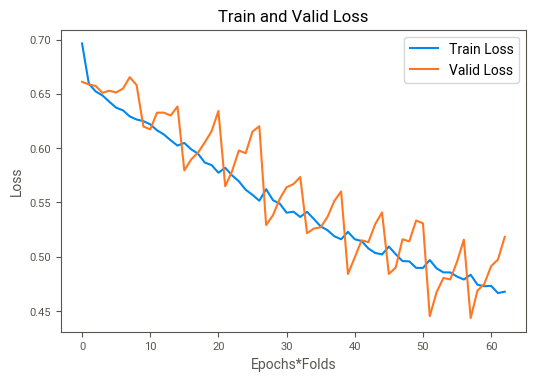

{'Adam/0.001/128/256/128/relu/relu/relu/without_dropout': [0.6868332602659653],
 'Adam/0.001/128/256/128/relu/relu/relu': [0.6910711676165424],
 'Adam/0.0001/128/256/128/relu/relu/relu': [0.6882946076282332],
 'SGD/0.001/128/256/128/relu/relu/relu': [0.6028057869355545],
 'SGD/0.0001/128/256/128/relu/relu/relu': [0.6028057869355545],
 'Adam/0.001/256/512/256/relu/relu/relu': [0.6913634370889961],
 'Adam/0.001/256/512/256/leaky_relu/leaky_relu/leaky_relu': [0.6861025865848313],
 'Adam/0.001/256/512/256/tanh/tanh/tanh': [0.6884407423644601],
 'Final1': [0.6567295046032442],
 'Final2': [0.6673973403478006]}

In [42]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


# Define model architecture
model = keras.Sequential([
    # Input Layer
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_dummy.shape[1],)),
    
    # Hidden Layers
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),
    
    # Output Layer
    keras.layers.Dense(y_train_ohe.shape[1], activation='softmax')
])

# Define early stopping parameters
early_stopping_patience = 5 # Stop training if no improvement after 5 epochs
early_stopping_min_delta = 0.01 # Stop training if improvement is less than 0.01%
# Create EarlyStopping callback object
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, min_delta=early_stopping_min_delta)
# Define where to save the best model based on validation accuracy
best_model_path = 'best_model.Final3'
# Create ModelCheckpoint callback object
model_checkpoint = ModelCheckpoint(best_model_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
                                  
# Compile model with categorical crossentropy loss and Adam optimizer with learning rate 0.001
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model with mini-batch and stratified kfold validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []
losses = {'train': [], 'valid': []}  # Initialize dictionary to store losses

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_dummy, y_train_ohe.argmax(1))):
    
    # Split data into training and validation sets for this fold
    X_fold_train, X_fold_val = X_train_dummy.iloc[train_idx], X_train_dummy.iloc[val_idx]
    y_fold_train, y_fold_val = y_train_ohe[train_idx], y_train_ohe[val_idx]
    
    # Train model on this fold's training set
    
    history = model.fit(X_fold_train, y_fold_train, epochs=30, batch_size=16, validation_data=(X_fold_val, y_fold_val),
                    callbacks=[early_stopping, model_checkpoint])

    # Evaluate model on this fold's validation set
    score = model.evaluate(X_fold_val, y_fold_val)[1]
    scores.append(score)
    
    # Print current fold's validation accuracy
    print(f"Validation accuracy (fold {fold+1}): {score:.3f}")

    # Append train and validation losses for this fold to the losses dictionary
    losses['train'].extend(history.history['loss'])
    losses['valid'].extend(history.history['val_loss'])
    
    # Print current fold's train and validation losses
    print(f"Train loss (fold {fold+1}): {np.mean(losses['train'][-len(history.history['loss']):]):.3f}")
    print(f"Validation loss (fold {fold+1}): {np.mean(losses['valid'][-len(history.history['val_loss']):]):.3f}")

# Calculate mean and standard deviation of validation accuracies across all folds
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"Mean validation accuracy: {mean_score:.3f}")
print(f"Standard deviation of validation accuracies: {std_score:.3f}")
# Load the saved best model
best_model = load_model(best_model_path)
# Evaluate final model on test set
test_pred = best_model.predict(X_test_dummy)
test_accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), np.argmax(test_pred, axis=1))
print(f"Test set accuracy score: {test_accuracy:.3f}")
# Plot train and test losses against epochs
fig, ax = plt.subplots()
ax.plot(losses['train'], label='Train Loss')
ax.plot(losses['valid'], label='Valid Loss')
ax.set_xlabel('Epochs*Folds')
ax.set_ylabel('Loss')
ax.set_title('Train and Valid Loss')
ax.legend()
plt.show()

f3_losses=losses

dict["Final2"]=[test_accuracy]
dict

Epoch 1/30
1523/1540 [============================>.] - ETA: 0s - loss: 0.6990 - accuracy: 0.6767
Epoch 1: val_accuracy improved from -inf to 0.69090, saving model to best_model.Final4


INFO:tensorflow:Assets written to: best_model.Final4/assets


INFO:tensorflow:Assets written to: best_model.Final4/assets


1540/1540 [==============================] - 6s 3ms/step - loss: 0.6990 - accuracy: 0.6767 - val_loss: 0.6555 - val_accuracy: 0.6909
Epoch 2/30
1522/1540 [============================>.] - ETA: 0s - loss: 0.6611 - accuracy: 0.6892
Epoch 2: val_accuracy did not improve from 0.69090
1540/1540 [==============================] - 4s 3ms/step - loss: 0.6612 - accuracy: 0.6892 - val_loss: 0.6553 - val_accuracy: 0.6909
Epoch 3/30
1537/1540 [============================>.] - ETA: 0s - loss: 0.6528 - accuracy: 0.6905
Epoch 3: val_accuracy did not improve from 0.69090
86/86 [==============================] - 0s 1ms/step - loss: 0.6529 - accuracy: 0.6847
Validation accuracy (fold 1): 0.685
Train loss (fold 1): 0.671
Validation loss (fold 1): 0.655
Epoch 1/30
1531/1540 [============================>.] - ETA: 0s - loss: 0.6499 - accuracy: 0.6943
Epoch 1: val_accuracy improved from 0.69090 to 0.69967, saving model to best_model.Final4


INFO:tensorflow:Assets written to: best_model.Final4/assets


INFO:tensorflow:Assets written to: best_model.Final4/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.6494 - accuracy: 0.6947 - val_loss: 0.6332 - val_accuracy: 0.6997
Epoch 2/30
1538/1540 [============================>.] - ETA: 0s - loss: 0.6456 - accuracy: 0.6921
Epoch 2: val_accuracy improved from 0.69967 to 0.70223, saving model to best_model.Final4


INFO:tensorflow:Assets written to: best_model.Final4/assets


INFO:tensorflow:Assets written to: best_model.Final4/assets


1540/1540 [==============================] - 4s 3ms/step - loss: 0.6458 - accuracy: 0.6920 - val_loss: 0.6394 - val_accuracy: 0.7022
Epoch 3/30
1540/1540 [==============================] - ETA: 0s - loss: 0.6396 - accuracy: 0.6970
Epoch 3: val_accuracy did not improve from 0.70223
86/86 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.7011
Validation accuracy (fold 2): 0.701
Train loss (fold 2): 0.645
Validation loss (fold 2): 0.637
Epoch 1/30
1525/1540 [============================>.] - ETA: 0s - loss: 0.6390 - accuracy: 0.6964
Epoch 1: val_accuracy improved from 0.70223 to 0.70515, saving model to best_model.Final4


INFO:tensorflow:Assets written to: best_model.Final4/assets


INFO:tensorflow:Assets written to: best_model.Final4/assets


1540/1540 [==============================] - 4s 3ms/step - loss: 0.6389 - accuracy: 0.6964 - val_loss: 0.6219 - val_accuracy: 0.7052
Epoch 2/30
1532/1540 [============================>.] - ETA: 0s - loss: 0.6344 - accuracy: 0.6975
Epoch 2: val_accuracy did not improve from 0.70515
1540/1540 [==============================] - 4s 2ms/step - loss: 0.6347 - accuracy: 0.6974 - val_loss: 0.6283 - val_accuracy: 0.7026
Epoch 3/30
1527/1540 [============================>.] - ETA: 0s - loss: 0.6314 - accuracy: 0.6997
Epoch 3: val_accuracy improved from 0.70515 to 0.70552, saving model to best_model.Final4


INFO:tensorflow:Assets written to: best_model.Final4/assets


INFO:tensorflow:Assets written to: best_model.Final4/assets


86/86 [==============================] - 0s 1ms/step - loss: 0.6257 - accuracy: 0.7055
Validation accuracy (fold 3): 0.706
Train loss (fold 3): 0.635
Validation loss (fold 3): 0.625
Epoch 1/30
1533/1540 [============================>.] - ETA: 0s - loss: 0.6278 - accuracy: 0.7000
Epoch 1: val_accuracy improved from 0.70552 to 0.70771, saving model to best_model.Final4


INFO:tensorflow:Assets written to: best_model.Final4/assets


INFO:tensorflow:Assets written to: best_model.Final4/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.6275 - accuracy: 0.7003 - val_loss: 0.6141 - val_accuracy: 0.7077
Epoch 2/30
1530/1540 [============================>.] - ETA: 0s - loss: 0.6213 - accuracy: 0.7043
Epoch 2: val_accuracy did not improve from 0.70771
1540/1540 [==============================] - 4s 2ms/step - loss: 0.6213 - accuracy: 0.7041 - val_loss: 0.6298 - val_accuracy: 0.7022
Epoch 3/30
1531/1540 [============================>.] - ETA: 0s - loss: 0.6171 - accuracy: 0.7054
Epoch 3: val_accuracy did not improve from 0.70771
86/86 [==============================] - 0s 1ms/step - loss: 0.6279 - accuracy: 0.7066
Validation accuracy (fold 4): 0.707
Train loss (fold 4): 0.622
Validation loss (fold 4): 0.624
Epoch 1/30
1534/1540 [============================>.] - ETA: 0s - loss: 0.6188 - accuracy: 0.7045
Epoch 1: val_accuracy improved from 0.70771 to 0.71648, saving model to best_model.Final4


INFO:tensorflow:Assets written to: best_model.Final4/assets


INFO:tensorflow:Assets written to: best_model.Final4/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.6193 - accuracy: 0.7042 - val_loss: 0.5933 - val_accuracy: 0.7165
Epoch 2/30
1533/1540 [============================>.] - ETA: 0s - loss: 0.6132 - accuracy: 0.7086
Epoch 2: val_accuracy did not improve from 0.71648
1540/1540 [==============================] - 4s 3ms/step - loss: 0.6136 - accuracy: 0.7082 - val_loss: 0.6016 - val_accuracy: 0.7059
Epoch 3/30
1536/1540 [============================>.] - ETA: 0s - loss: 0.6064 - accuracy: 0.7110
Epoch 3: val_accuracy did not improve from 0.71648
86/86 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.7077
Validation accuracy (fold 5): 0.708
Train loss (fold 5): 0.613
Validation loss (fold 5): 0.602
Epoch 1/30
1518/1540 [============================>.] - ETA: 0s - loss: 0.6054 - accuracy: 0.7123
Epoch 1: val_accuracy did not improve from 0.71648
1540/1540 [==============================] - 4s 3ms/step - loss: 0.6050 - accuracy: 0.7124 - val_loss: 0.

INFO:tensorflow:Assets written to: best_model.Final4/assets


INFO:tensorflow:Assets written to: best_model.Final4/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.5946 - accuracy: 0.7169 - val_loss: 0.5829 - val_accuracy: 0.7212
Epoch 2/30
1539/1540 [============================>.] - ETA: 0s - loss: 0.5882 - accuracy: 0.7165
Epoch 2: val_accuracy did not improve from 0.72123
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5882 - accuracy: 0.7166 - val_loss: 0.5968 - val_accuracy: 0.7136
Epoch 3/30
1528/1540 [============================>.] - ETA: 0s - loss: 0.5816 - accuracy: 0.7258
Epoch 3: val_accuracy did not improve from 0.72123
86/86 [==============================] - 0s 1ms/step - loss: 0.6029 - accuracy: 0.7168
Validation accuracy (fold 7): 0.717
Train loss (fold 7): 0.588
Validation loss (fold 7): 0.594
Epoch 1/30
1527/1540 [============================>.] - ETA: 0s - loss: 0.5814 - accuracy: 0.7231
Epoch 1: val_accuracy did not improve from 0.72123
1540/1540 [==============================] - 4s 2ms/step - loss: 0.5813 - accuracy: 0.7233 - val_loss: 0.

INFO:tensorflow:Assets written to: best_model.Final4/assets


INFO:tensorflow:Assets written to: best_model.Final4/assets


1540/1540 [==============================] - 5s 3ms/step - loss: 0.5720 - accuracy: 0.7261 - val_loss: 0.5476 - val_accuracy: 0.7410
Epoch 2/30
1522/1540 [============================>.] - ETA: 0s - loss: 0.5671 - accuracy: 0.7302
Epoch 2: val_accuracy did not improve from 0.74096
1540/1540 [==============================] - 4s 3ms/step - loss: 0.5667 - accuracy: 0.7303 - val_loss: 0.5790 - val_accuracy: 0.7311
Epoch 3/30
1527/1540 [============================>.] - ETA: 0s - loss: 0.5612 - accuracy: 0.7325
Epoch 3: val_accuracy did not improve from 0.74096
86/86 [==============================] - 0s 1ms/step - loss: 0.5770 - accuracy: 0.7344
Validation accuracy (fold 9): 0.734
Train loss (fold 9): 0.567
Validation loss (fold 9): 0.568
Epoch 1/30
1529/1540 [============================>.] - ETA: 0s - loss: 0.5624 - accuracy: 0.7336
Epoch 1: val_accuracy did not improve from 0.74096
1540/1540 [==============================] - 4s 2ms/step - loss: 0.5623 - accuracy: 0.7336 - val_loss: 0.

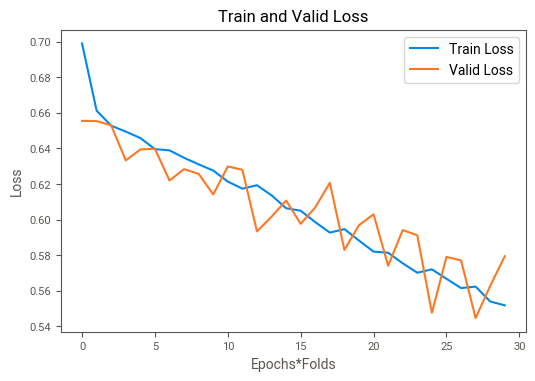

{'Adam/0.001/128/256/128/relu/relu/relu/without_dropout': [0.6868332602659653],
 'Adam/0.001/128/256/128/relu/relu/relu': [0.6910711676165424],
 'Adam/0.0001/128/256/128/relu/relu/relu': [0.6882946076282332],
 'SGD/0.001/128/256/128/relu/relu/relu': [0.6028057869355545],
 'SGD/0.0001/128/256/128/relu/relu/relu': [0.6028057869355545],
 'Adam/0.001/256/512/256/relu/relu/relu': [0.6913634370889961],
 'Adam/0.001/256/512/256/leaky_relu/leaky_relu/leaky_relu': [0.6861025865848313],
 'Adam/0.001/256/512/256/tanh/tanh/tanh': [0.6884407423644601],
 'Final1': [0.6567295046032442],
 'Final2': [0.6673973403478006],
 'Final3': [0.6787958497734912]}

In [44]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


# Define model architecture
model = keras.Sequential([
    # Input Layer
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_dummy.shape[1],)),
    
    # Hidden Layers
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.25),
    # Hidden Layers
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),
    
    # Output Layer
    keras.layers.Dense(y_train_ohe.shape[1], activation='softmax')
])

# Define early stopping parameters
early_stopping_patience = 2 # Stop training if no improvement after 5 epochs
early_stopping_min_delta = 0.01 # Stop training if improvement is less than 0.01%
# Create EarlyStopping callback object
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, min_delta=early_stopping_min_delta)
# Define where to save the best model based on validation accuracy
best_model_path = 'best_model.Final4'
# Create ModelCheckpoint callback object
model_checkpoint = ModelCheckpoint(best_model_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
                                  
# Compile model with categorical crossentropy loss and Adam optimizer with learning rate 0.001
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model with mini-batch and stratified kfold validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []
losses = {'train': [], 'valid': []}  # Initialize dictionary to store losses

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_dummy, y_train_ohe.argmax(1))):
    
    # Split data into training and validation sets for this fold
    X_fold_train, X_fold_val = X_train_dummy.iloc[train_idx], X_train_dummy.iloc[val_idx]
    y_fold_train, y_fold_val = y_train_ohe[train_idx], y_train_ohe[val_idx]
    
    # Train model on this fold's training set
    
    history = model.fit(X_fold_train, y_fold_train, epochs=30, batch_size=16, validation_data=(X_fold_val, y_fold_val),
                    callbacks=[early_stopping, model_checkpoint])

    # Evaluate model on this fold's validation set
    score = model.evaluate(X_fold_val, y_fold_val)[1]
    scores.append(score)
    
    # Print current fold's validation accuracy
    print(f"Validation accuracy (fold {fold+1}): {score:.3f}")

    # Append train and validation losses for this fold to the losses dictionary
    losses['train'].extend(history.history['loss'])
    losses['valid'].extend(history.history['val_loss'])
    
    # Print current fold's train and validation losses
    print(f"Train loss (fold {fold+1}): {np.mean(losses['train'][-len(history.history['loss']):]):.3f}")
    print(f"Validation loss (fold {fold+1}): {np.mean(losses['valid'][-len(history.history['val_loss']):]):.3f}")

# Calculate mean and standard deviation of validation accuracies across all folds
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"Mean validation accuracy: {mean_score:.3f}")
print(f"Standard deviation of validation accuracies: {std_score:.3f}")
# Load the saved best model
best_model = load_model(best_model_path)
# Evaluate final model on test set
test_pred = best_model.predict(X_test_dummy)
test_accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), np.argmax(test_pred, axis=1))
print(f"Test set accuracy score: {test_accuracy:.3f}")
# Plot train and test losses against epochs
fig, ax = plt.subplots()
ax.plot(losses['train'], label='Train Loss')
ax.plot(losses['valid'], label='Valid Loss')
ax.set_xlabel('Epochs*Folds')
ax.set_ylabel('Loss')
ax.set_title('Train and Valid Loss')
ax.legend()
plt.show()

f4_losses=losses

dict["Final3"]=[test_accuracy]
dict

In [45]:
from sklearn.metrics import classification_report
# Evaluate final model on test set
test_pred = best_model.predict(X_test_dummy)
test_accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), np.argmax(test_pred, axis=1))
print("Classification Report:")
print(classification_report(np.argmax(y_test_ohe, axis=1), np.argmax(test_pred, axis=1)))

214/214 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      4125
           1       0.54      0.55      0.54      2275
           2       0.23      0.01      0.02       443

    accuracy                           0.68      6843
   macro avg       0.51      0.46      0.45      6843
weighted avg       0.65      0.68      0.66      6843



In [37]:
print(y_test.value_counts())

def model_func(X):
    return best_model.predict(X)

sample = X_test_dummy.iloc[0]  # Get the first sample from the test set
probabilities = np.round(model_func(np.array([sample])),2)  # Predict the probabilities for the sample
print(probabilities)

Time_taken_to_sell_Target_Variable
Not sold within Three Weeks      4125
Sold in Less Than One Week       2275
Sold in Less Than Three Weeks     443
Name: count, dtype: int64
1/1 [==============================] - 0s 18ms/step
[[0.4  0.48 0.12]]


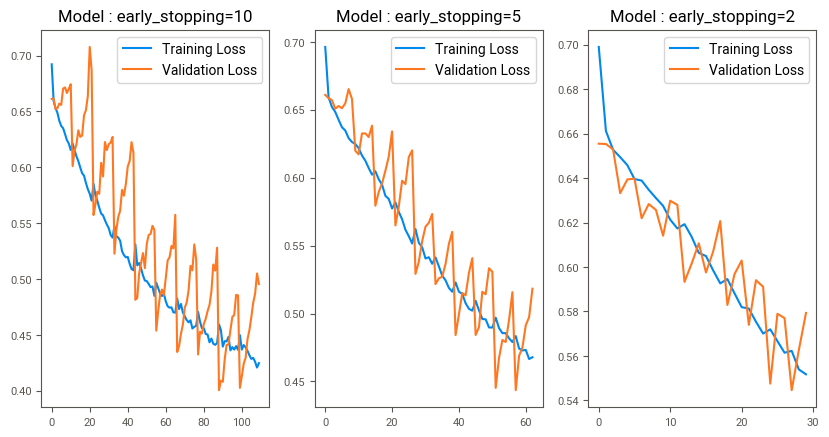

In [47]:
title=['early_stopping=10','early_stopping=5','early_stopping=2']
model_losses=[f2_losses,f3_losses,f4_losses]
fig=plt.figure(1,figsize=(10,5))
idx=1
for i in model_losses:
  ax=fig.add_subplot(1,3,idx)
  ax.plot(i['train'],label="Training Loss")
  ax.plot(i['valid'],label="Validation Loss")
  ax.set_title('Model : '+title[idx-1])
  idx+=1
  plt.legend();

## The classification report shows that the model has high precision and recall for class 0 (0.75 and 0.82, respectively), moderate precision and recall for class 1 (0.54 and 0.55, respectively), and low precision and recall for class 2 (0.23 and 0.01, respectively). The overall accuracy of the model is 0.68, and the macro average of precision, recall, and F1 score is around 0.45.